## Suicides in India -- Analysis ( Year : 2001 to 2012 )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
suicide_df = pd.read_csv('Suicides in India 2001-2012.csv')

In [3]:
suicide_df.head()

State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0

In [4]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
# As the 'Total' column indicates the number of suicde, total=0 does not make any sense in the dataset.  
suicide_df = suicide_df[suicide_df.Total!=0]

In [6]:
suicide_df.sample(10)

State  Year             Type_code  \
92044   Himachal Pradesh  2008      Education_Status   
74645            Gujarat  2001         Means_adopted   
32349              Bihar  2010      Education_Status   
98391    Jammu & Kashmir  2007         Means_adopted   
182293        Puducherry  2012  Professional_Profile   
62104         Delhi (Ut)  2003      Education_Status   
44150       Chhattisgarh  2007                Causes   
182570            Punjab  2001                Causes   
187583            Punjab  2010                Causes   
139827       Maharashtra  2009                Causes   

                                     Type  Gender Age_group  Total  
92044             Post Graduate and Above    Male    0-100+      1  
74645        By Self Infliction of injury    Male     45-59      3  
32349                             Diploma  Female    0-100+      8  
98391           By Consuming Other Poison  Female       60+      1  
182293                         Unemployed    Male     15-29     14  
62104               Matriculate/Secondary  Female    0-100+     93  
44150                    Causes Not known    Male       60+    104  
182570  Physical Abuse (Rape/Incest Etc.)    Male     45-59      6  
187583          Fall in Social Reputation  Female     30-44      1  
139827                    Family Problems  Female     30-44    662

In [7]:
suicide_df['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [8]:
# I can't understand what is '0-100+' as all other age groups are also in this range.
suicide_df = suicide_df[suicide_df.Age_group != '0-100+']
suicide_df.sample(10)

State  Year             Type_code  \
183022           Punjab  2002                Causes   
41318      Chhattisgarh  2002                Causes   
188746           Punjab  2012                Causes   
112955        Karnataka  2009         Means_adopted   
94758   Jammu & Kashmir  2001                Causes   
217900    Uttar Pradesh  2002                Causes   
236924      West Bengal  2011  Professional_Profile   
62227        Delhi (Ut)  2003         Means_adopted   
209403       Tamil Nadu  2012  Professional_Profile   
188340           Punjab  2011         Means_adopted   

                                           Type  Gender Age_group  Total  
183022                     Death of Dear Person    Male     15-29     10  
41318                   Other Prolonged Illness    Male       60+     46  
188746            Other Causes (Please Specity)    Male     30-44     11  
112955                By Consuming Other Poison  Female      0-14     15  
94758             Other Causes (Please Specity)  Female     45-59      1  
217900                          Family Problems    Male     30-44    211  
236924                    Professional Activity    Male     45-59    151  
62227           By Other means (please specify)    Male     45-59      6  
209403                                  Student  Female     30-44     19  
188340  By coming under running vehicles/trains  Female     15-29     23

In [9]:
suicide_df['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+'], dtype=object)

In [10]:
suicide_df.shape

(92159, 7)

In [11]:
starting_year = suicide_df['Year'].min()
ending_year = suicide_df['Year'].max()
print(f'The dataset contains data from {starting_year} to {ending_year}')

The dataset contains data from 2001 to 2012


In [12]:
States = pd.DataFrame(suicide_df['State'].unique(),columns =['State'])

In [13]:
print('Indian states where the data is collected from : \n\n',States)

Indian states where the data is collected from : 

                 State
0       A & N Islands
1      Andhra Pradesh
2   Arunachal Pradesh
3               Assam
4               Bihar
5          Chandigarh
6        Chhattisgarh
7        D & N Haveli
8         Daman & Diu
9          Delhi (Ut)
10                Goa
11            Gujarat
12            Haryana
13   Himachal Pradesh
14    Jammu & Kashmir
15          Jharkhand
16          Karnataka
17             Kerala
18        Lakshadweep
19     Madhya Pradesh
20        Maharashtra
21            Manipur
22          Meghalaya
23            Mizoram
24           Nagaland
25             Odisha
26         Puducherry
27             Punjab
28          Rajasthan
29             Sikkim
30         Tamil Nadu
31            Tripura
32      Uttar Pradesh
33        Uttarakhand
34        West Bengal


## State - Suicide 

In [14]:
statewise = suicide_df[['State','Total']].groupby('State').sum().reset_index()

In [15]:
statewise.sample(10)

State   Total
10                Goa   10413
25             Odisha  160338
22          Meghalaya    3243
2   Arunachal Pradesh    3977
13   Himachal Pradesh   15924
15          Jharkhand   29820
5          Chandigarh    3096
12            Haryana   88302
19     Madhya Pradesh  270921
34        West Bengal  497962

In [16]:
statewise = statewise.sort_values('Total',ascending = False)

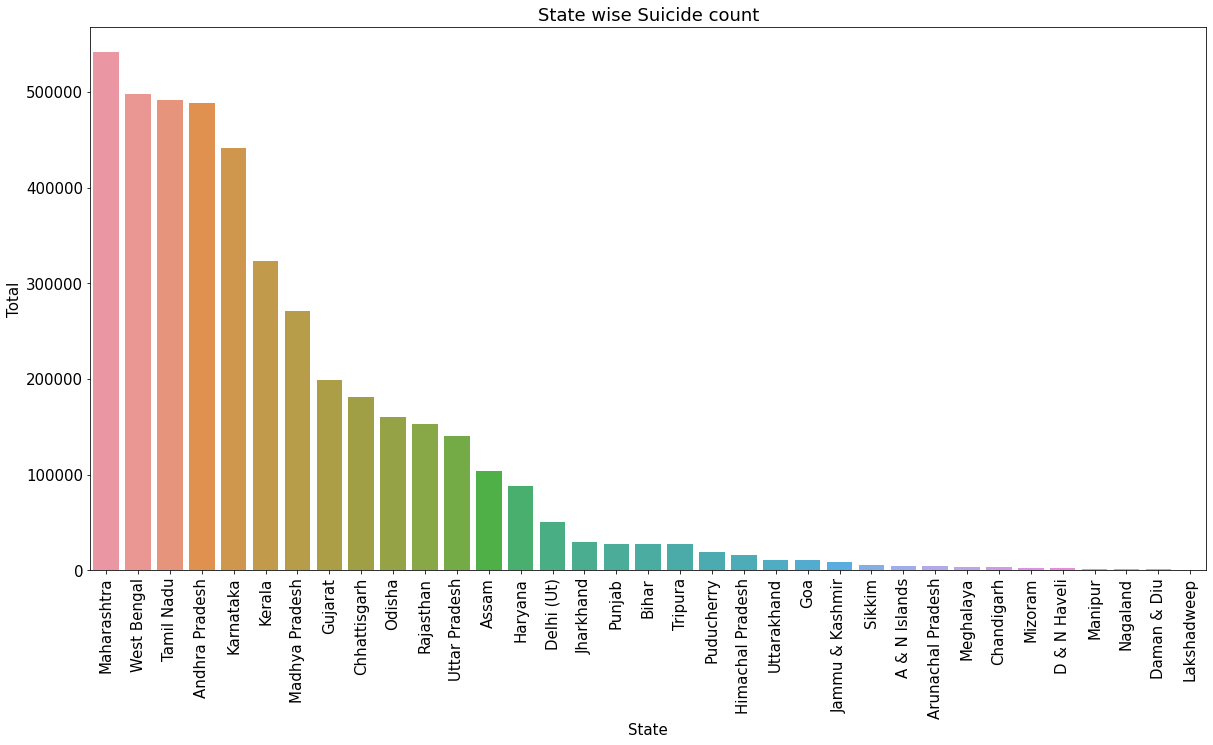

In [17]:
# Visualization
plt.figure(figsize= (20,10)) 
plt.rcParams.update({'font.size':15})
sns.barplot(x ='State', y ='Total', data = statewise)
plt.title('State wise Suicide count')
plt.xticks(rotation = 90)
plt.show()

In [18]:
# Top 10 States

print('Top 10 States that recorded highest number of suicides : \n\n',statewise.set_index('State').head(10))

Top 10 States that recorded highest number of suicides : 

                  Total
State                 
Maharashtra     541167
West Bengal     497962
Tamil Nadu      491065
Andhra Pradesh  488419
Karnataka       440895
Kerala          323074
Madhya Pradesh  270921
Gujarat         198504
Chhattisgarh    181364
Odisha          160338


In [19]:
suicide_reason = suicide_df[suicide_df['Type_code'] == 'Causes']
suicide_reason['Type'].value_counts()

Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paralysis 

In [20]:
# Category correction 
pd.options.mode.chained_assignment = None
suicide_reason.loc[suicide_reason['Type']=='Bankruptcy or Sudden change in Economic Status', 'Type'] = 'Bankruptcy or Sudden change in Economic Status'
suicide_reason.loc[suicide_reason['Type']=='Bankruptcy or Sudden change in Economic', 'Type'] = 'Bankruptcy or Sudden change in Economic Status'
suicide_reason.loc[suicide_reason['Type']=='Not having Children(Barrenness/Impotency', 'Type'] = 'Not having Children'
suicide_reason.loc[suicide_reason['Type']=='Not having Children (Barrenness/Impotency', 'Type'] = 'Not having Children'
suicide_reason.loc[suicide_reason['Type']=='Causes Not known', 'Type'] = 'Unknown'
suicide_reason.loc[suicide_reason['Type']=='Other Causes (Please Specity)', 'Type'] = 'Unknown'


In [21]:
suicide_reason['Type'].value_counts()

Unknown                                           6397
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Bankruptcy or Sudden change in Economic Status    1499
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Cancer                                            1233
Professional/Career Problem                       1160
Not having Children                               1131
Cancellation/Non-Settlement of Marriage           1116
Paralysis 

## Suicide Reasons ( Each State )

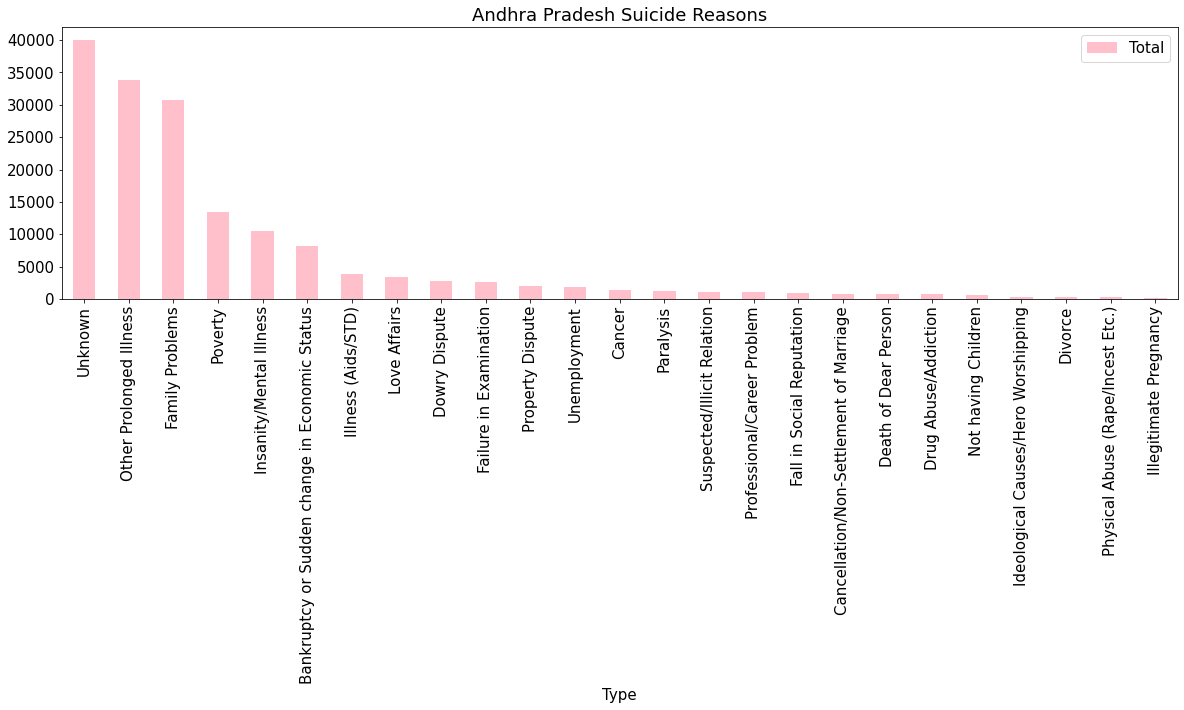

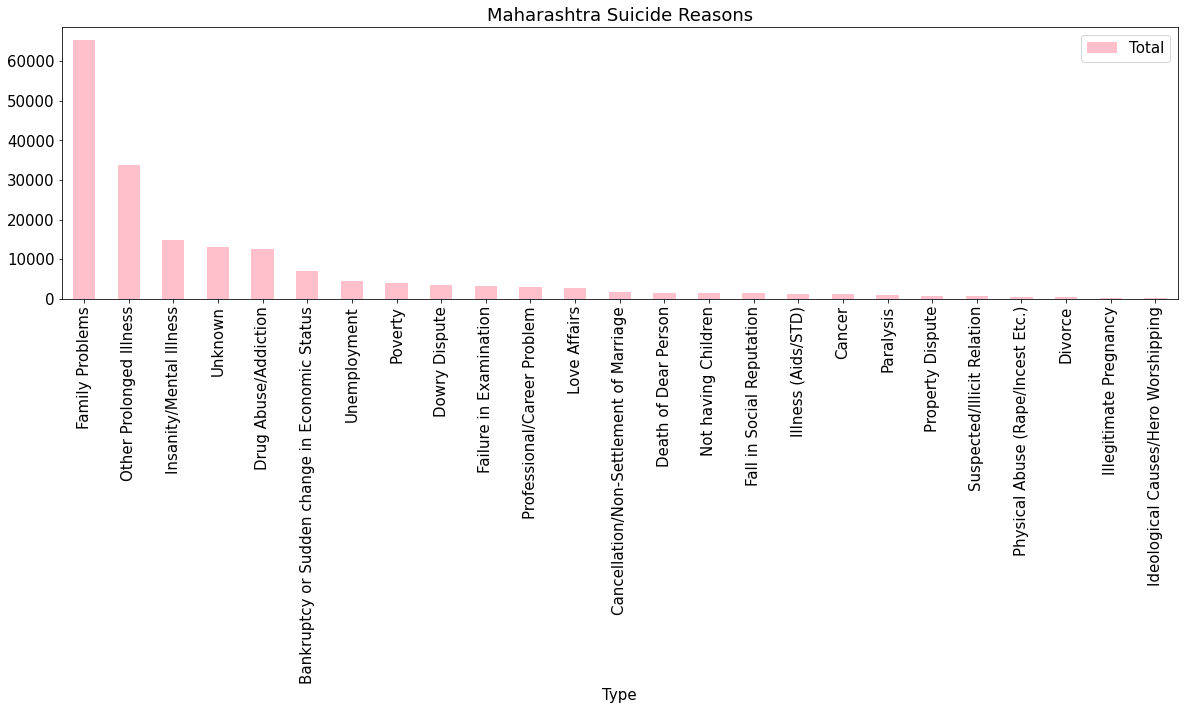

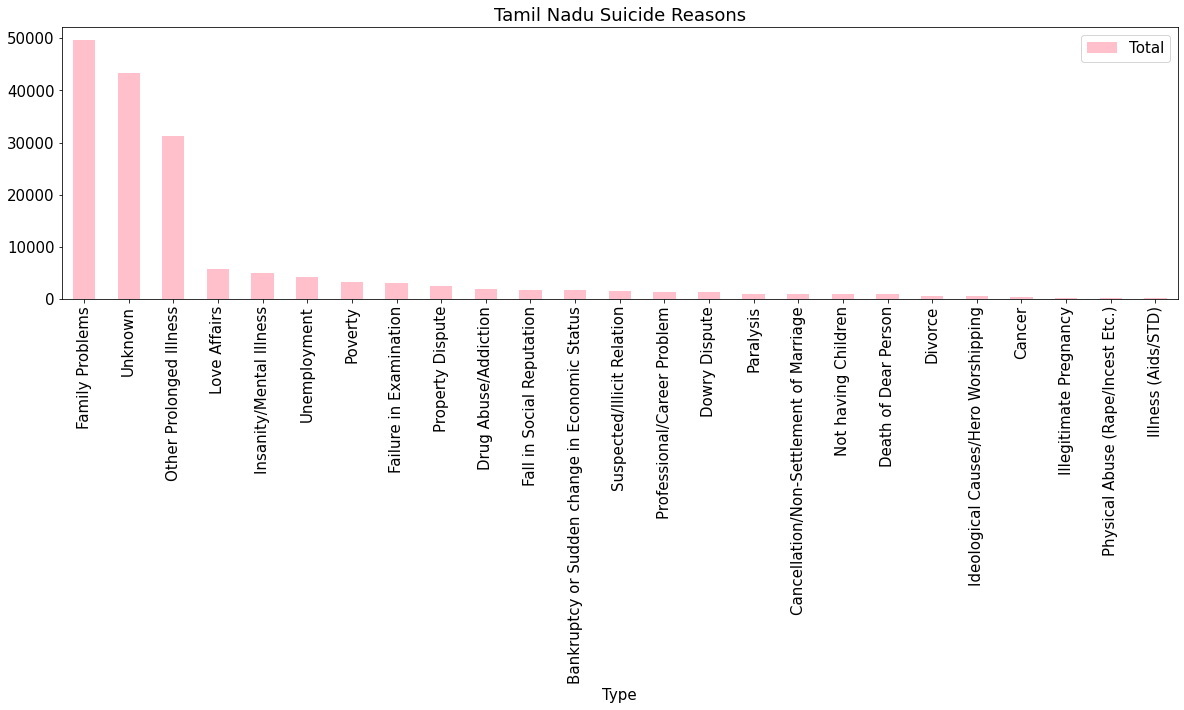

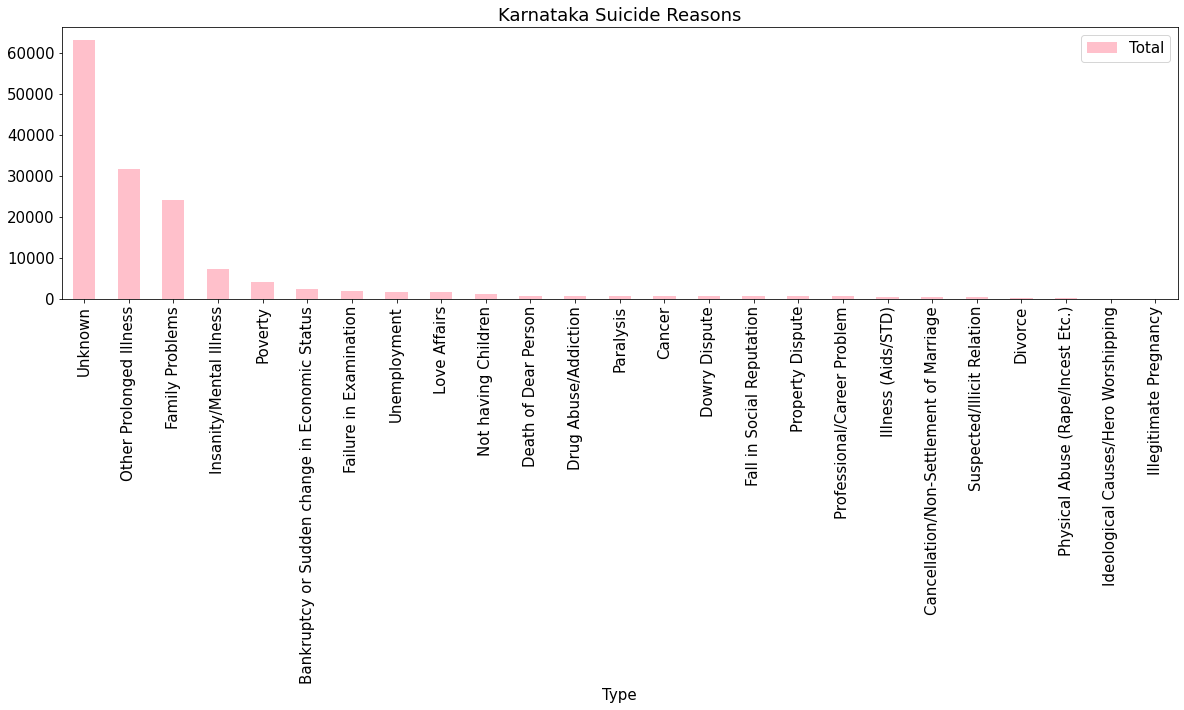

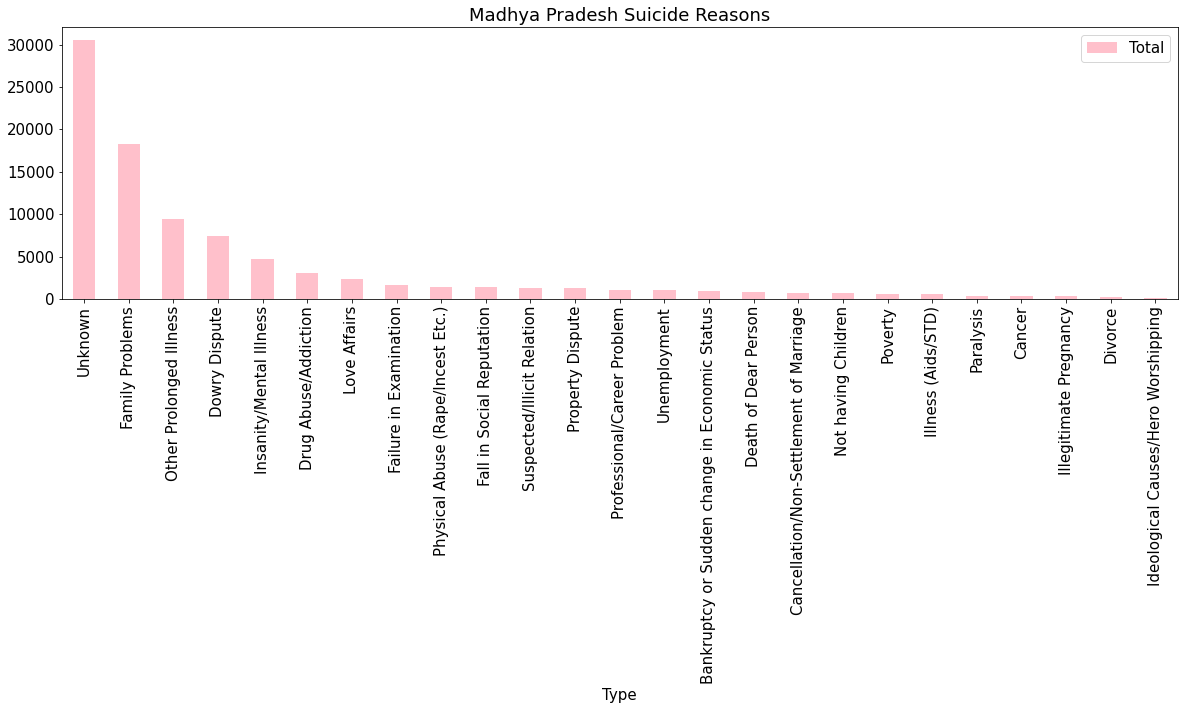

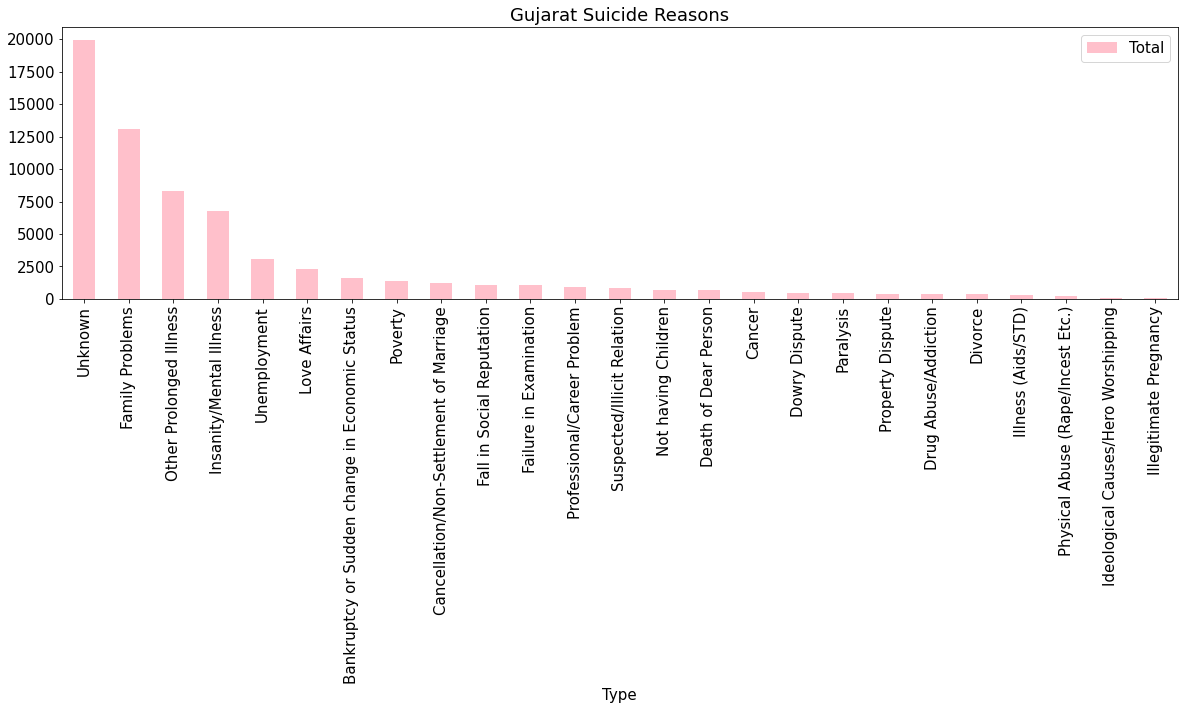

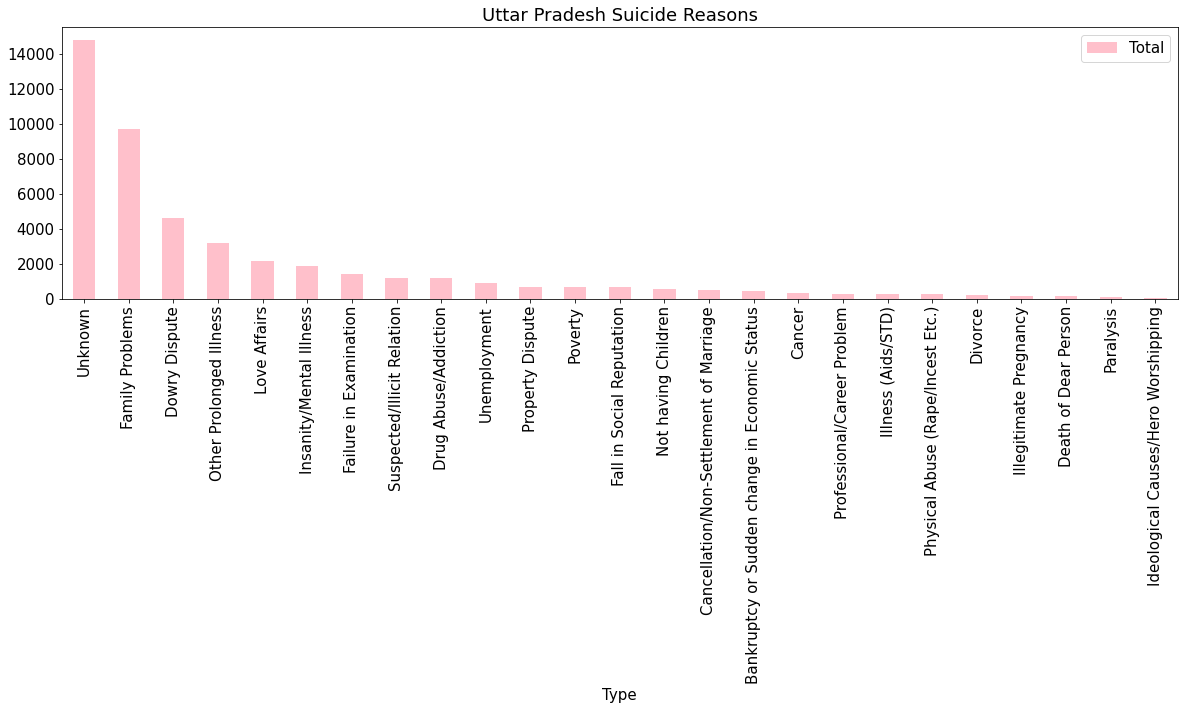

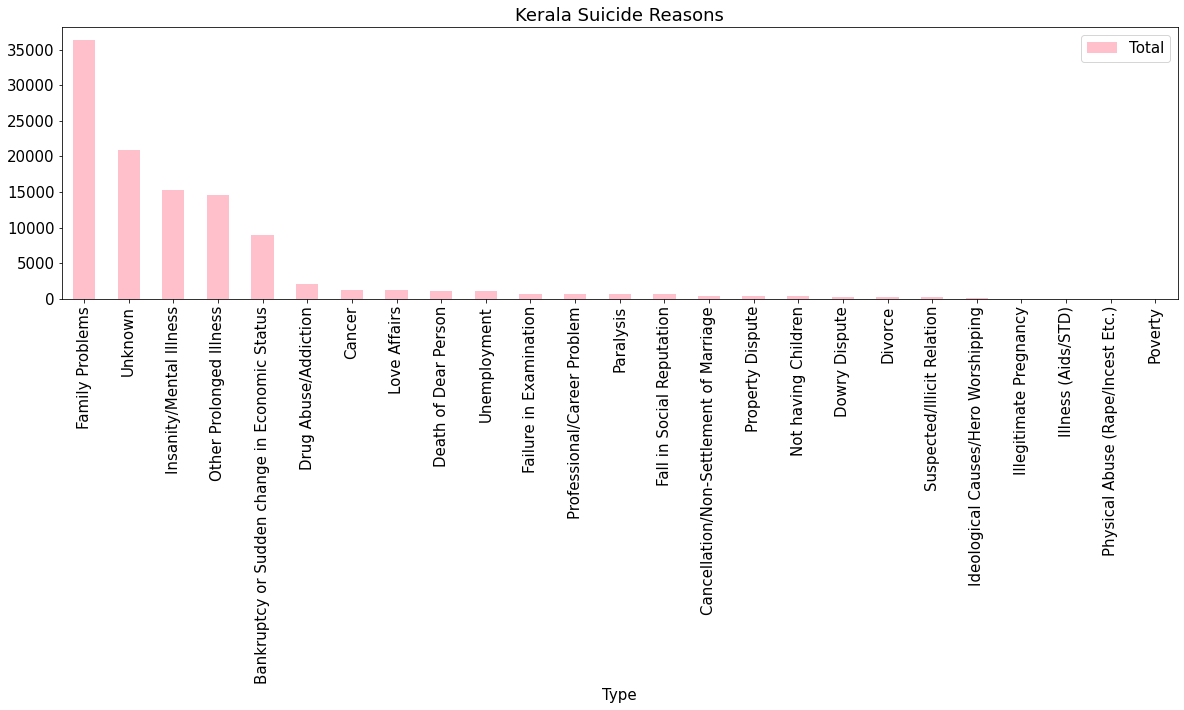

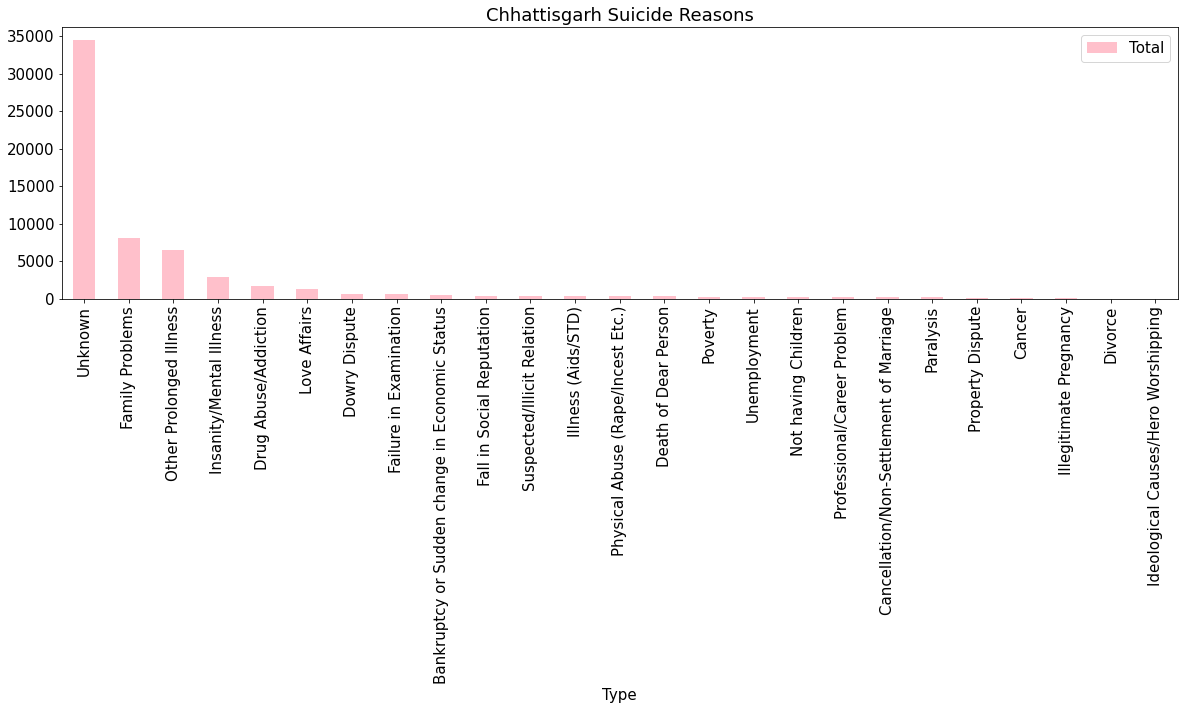

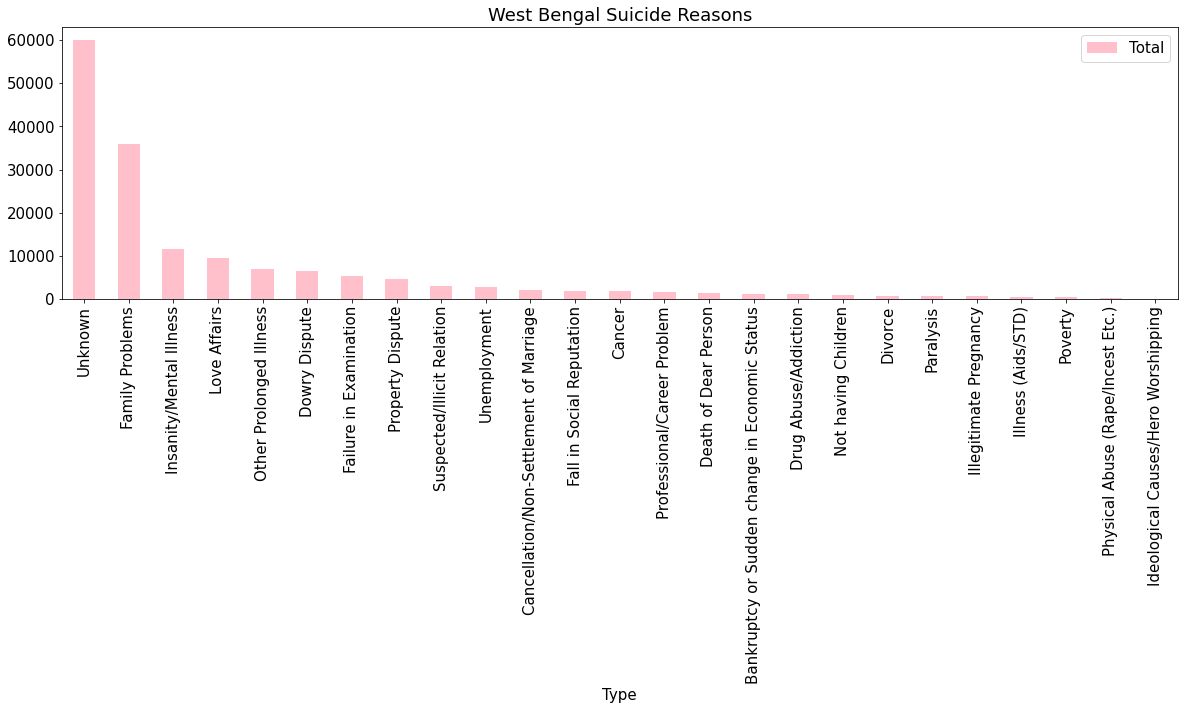

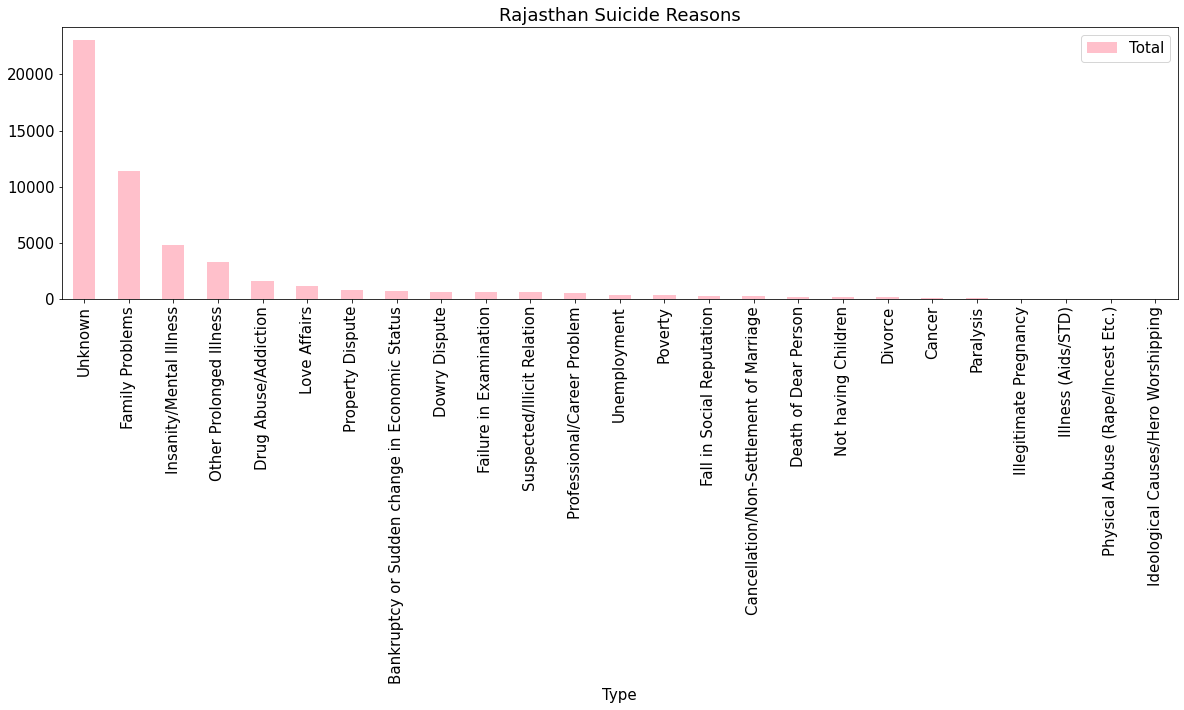

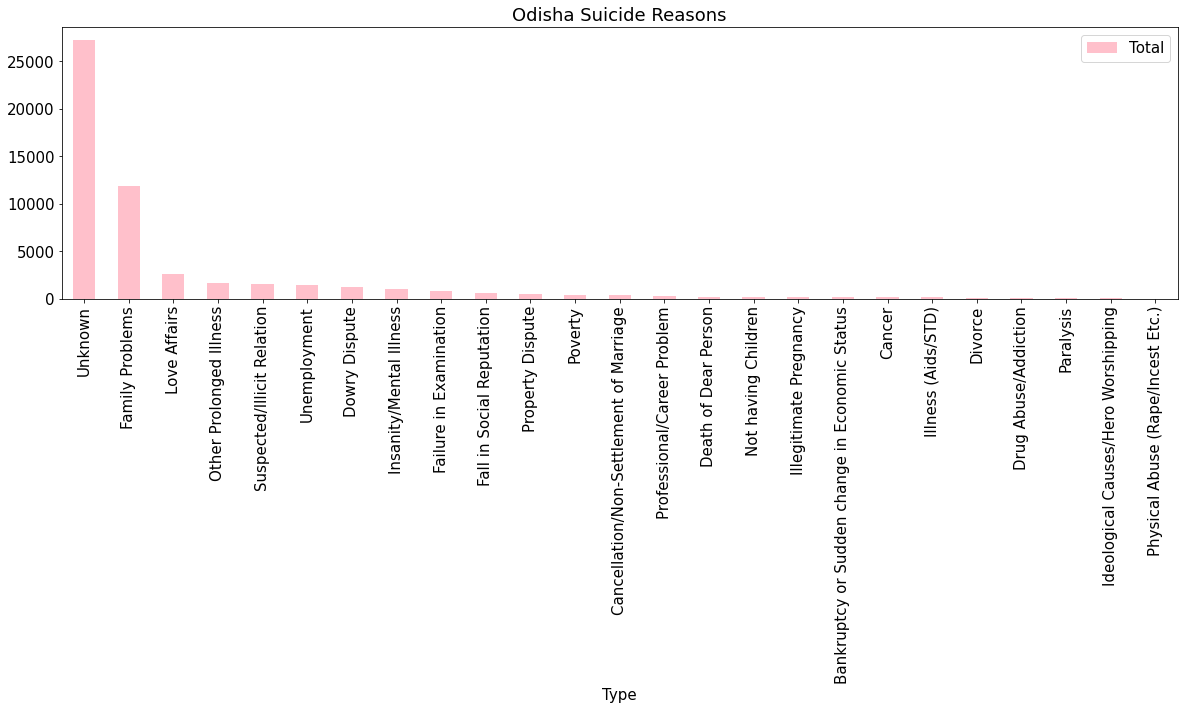

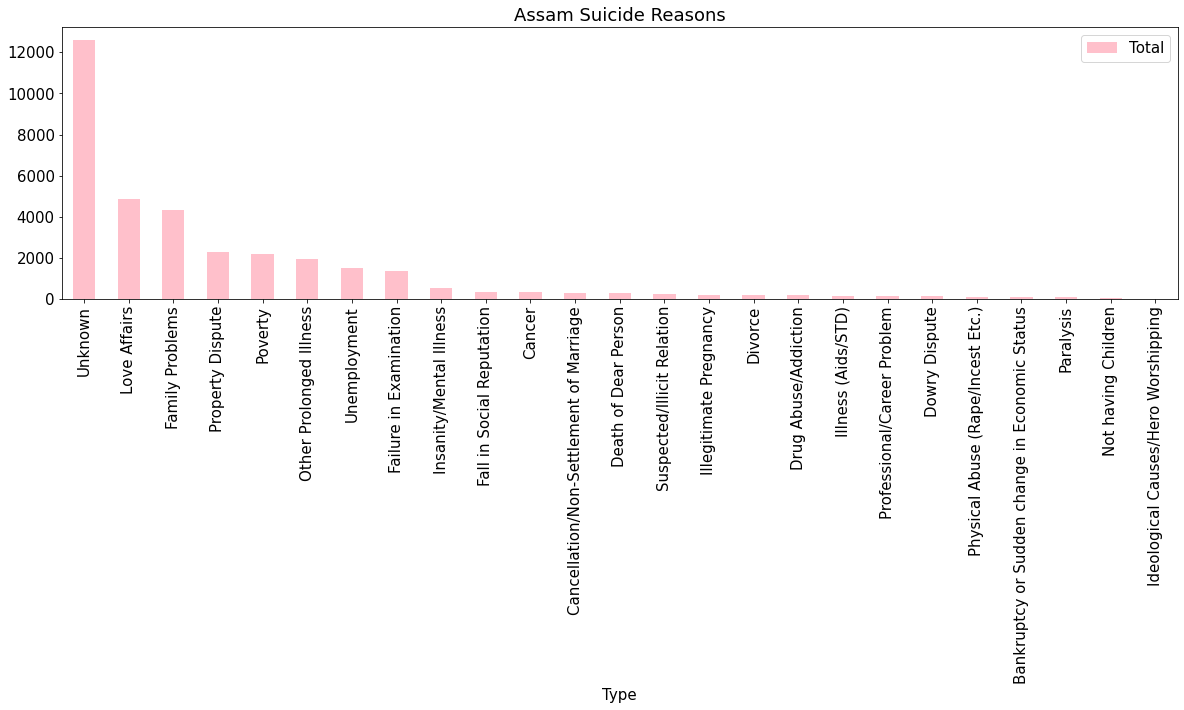

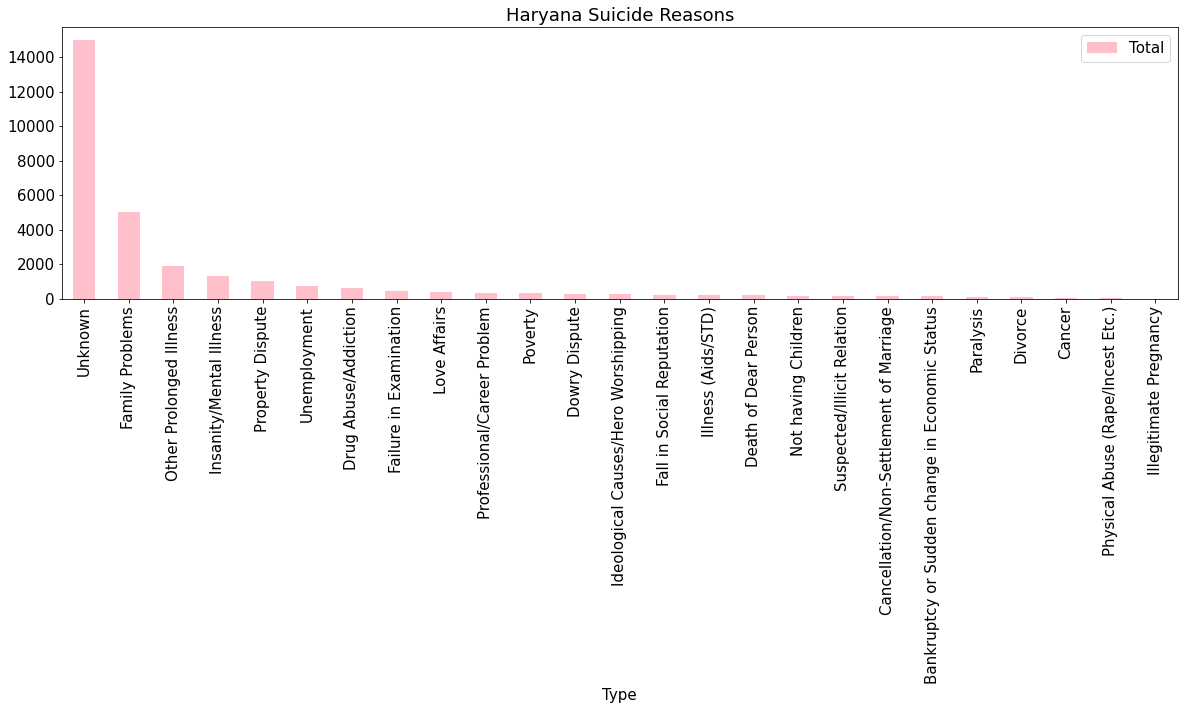

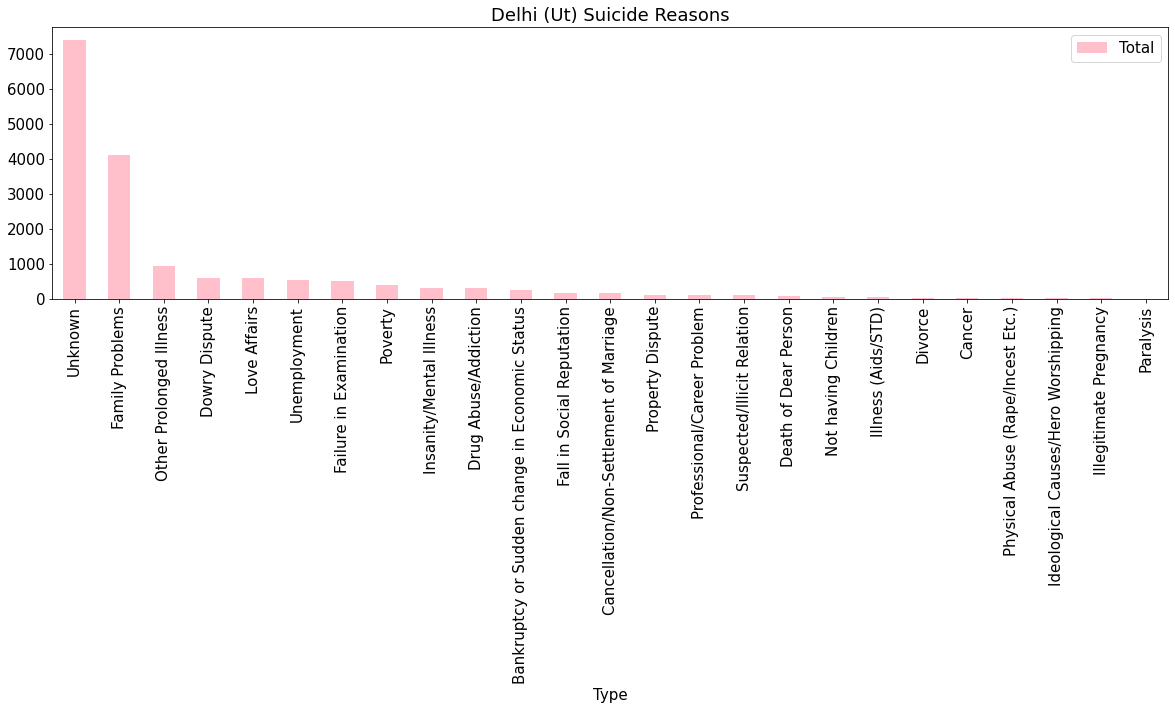

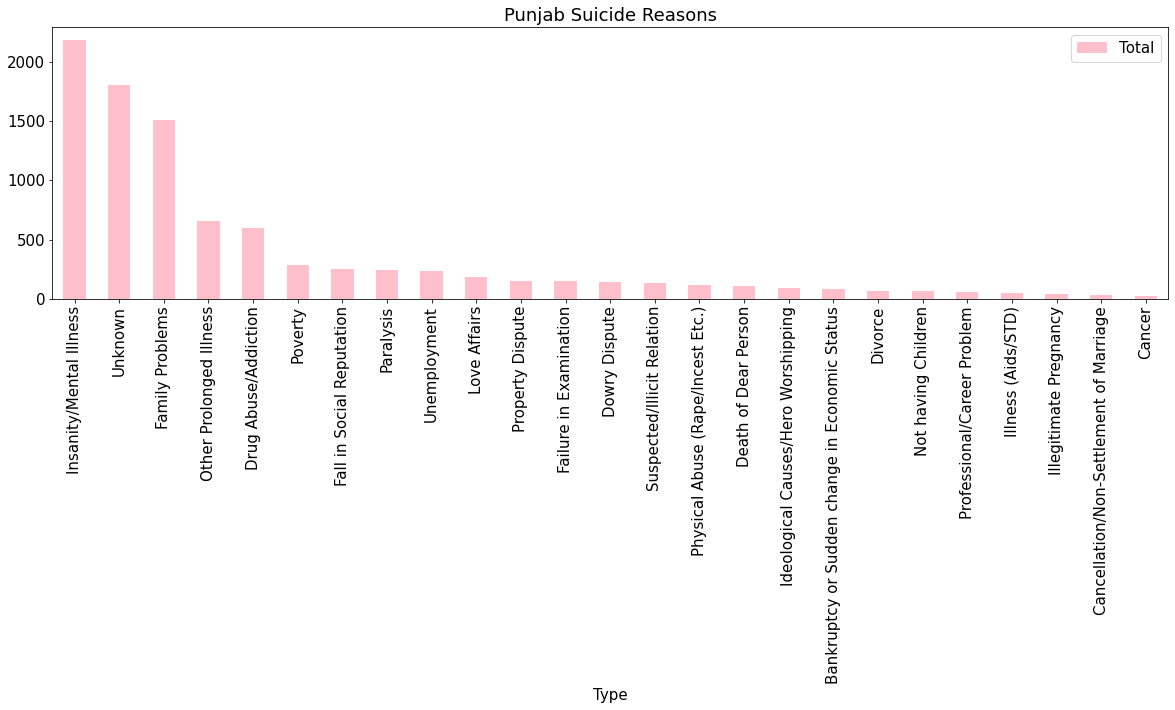

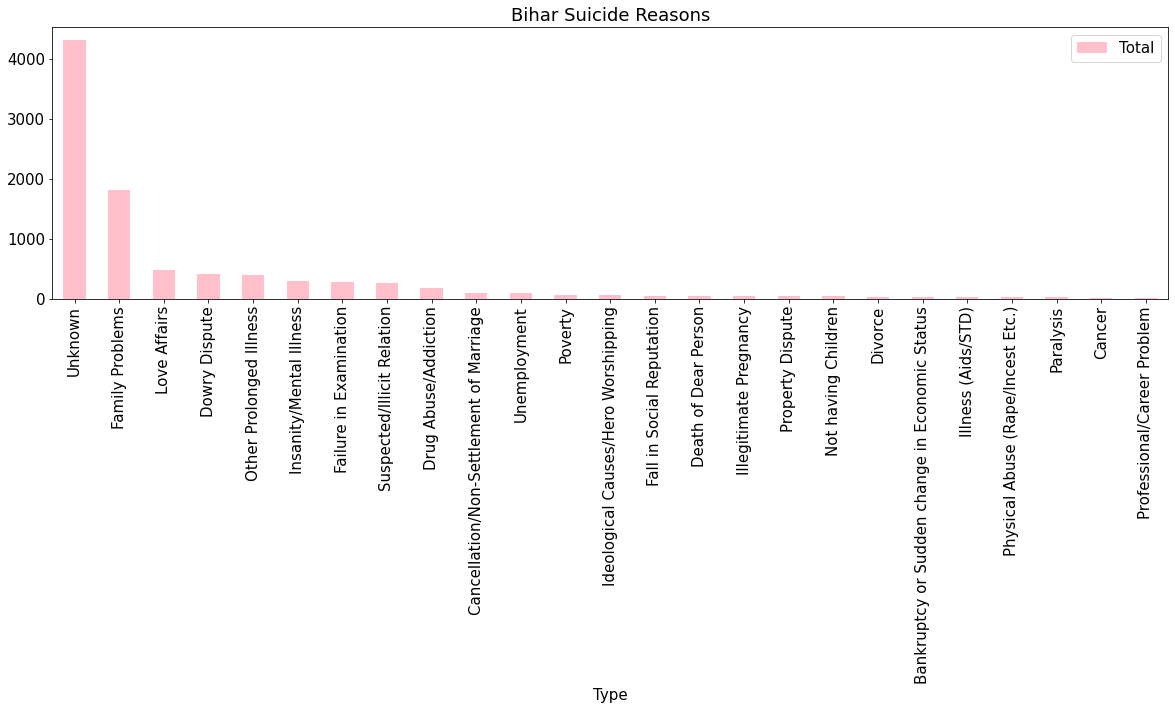

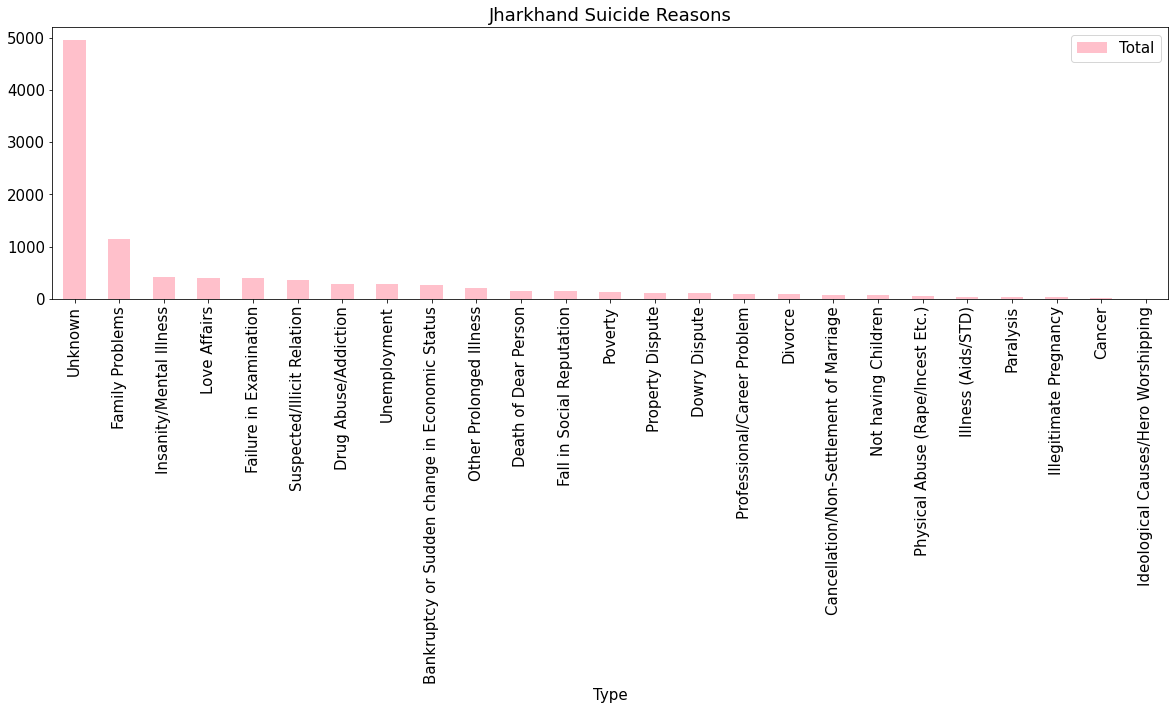

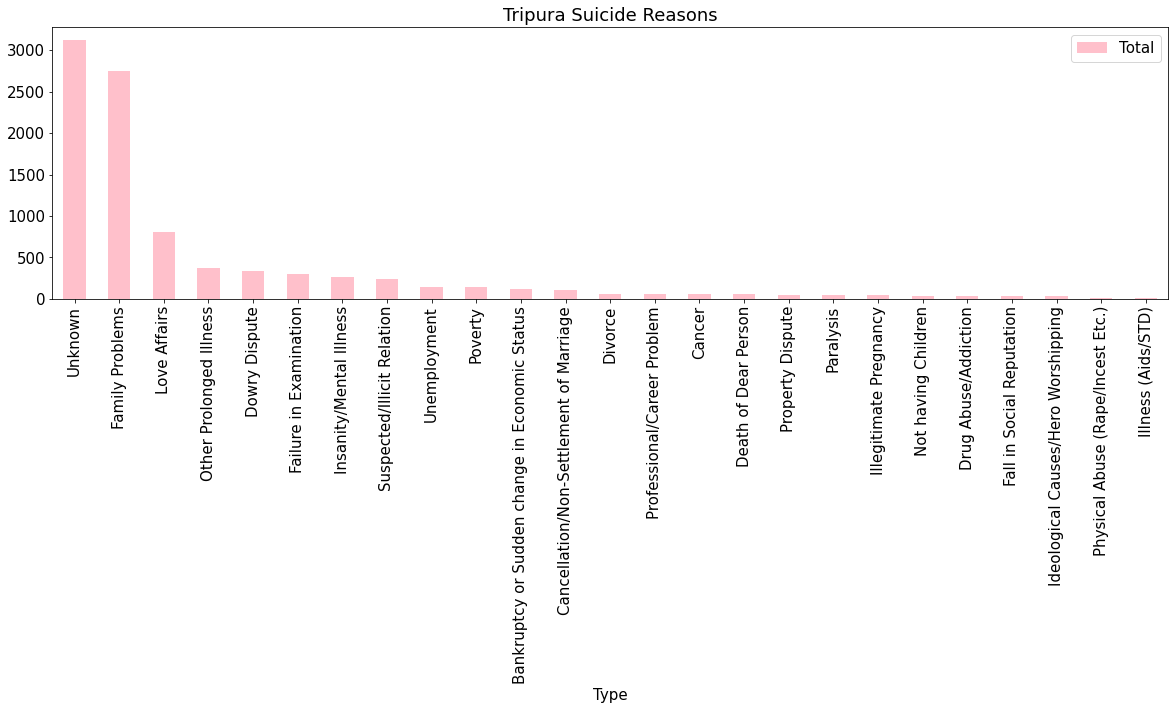

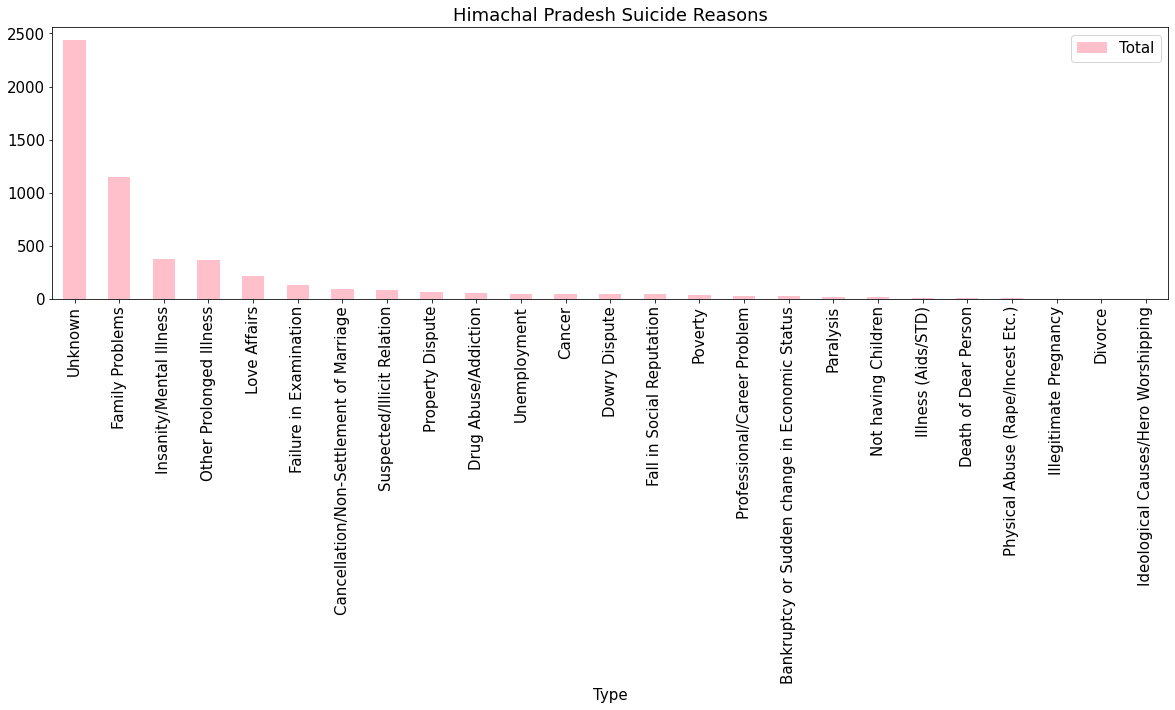

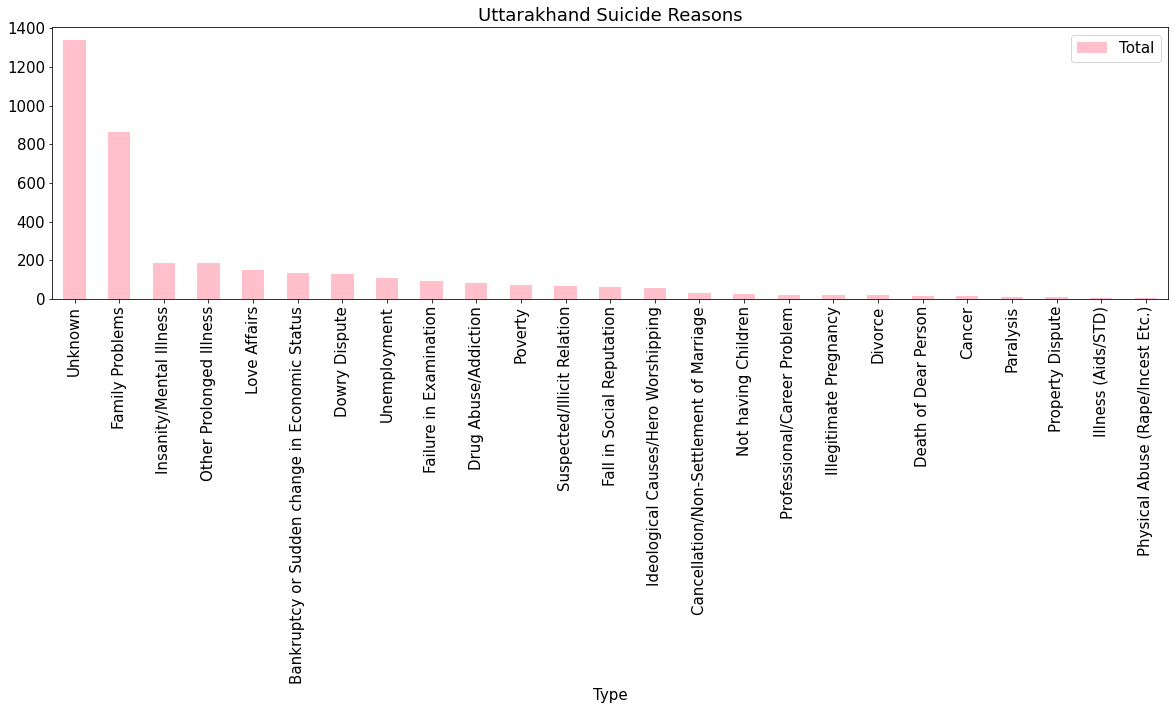

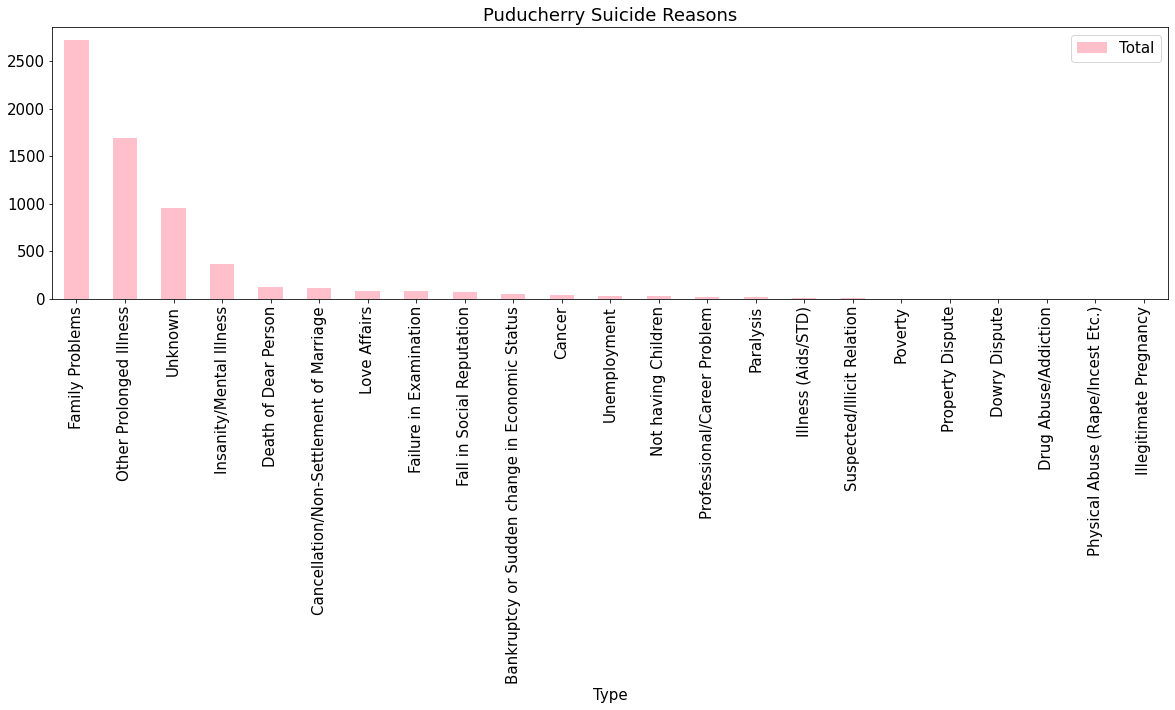

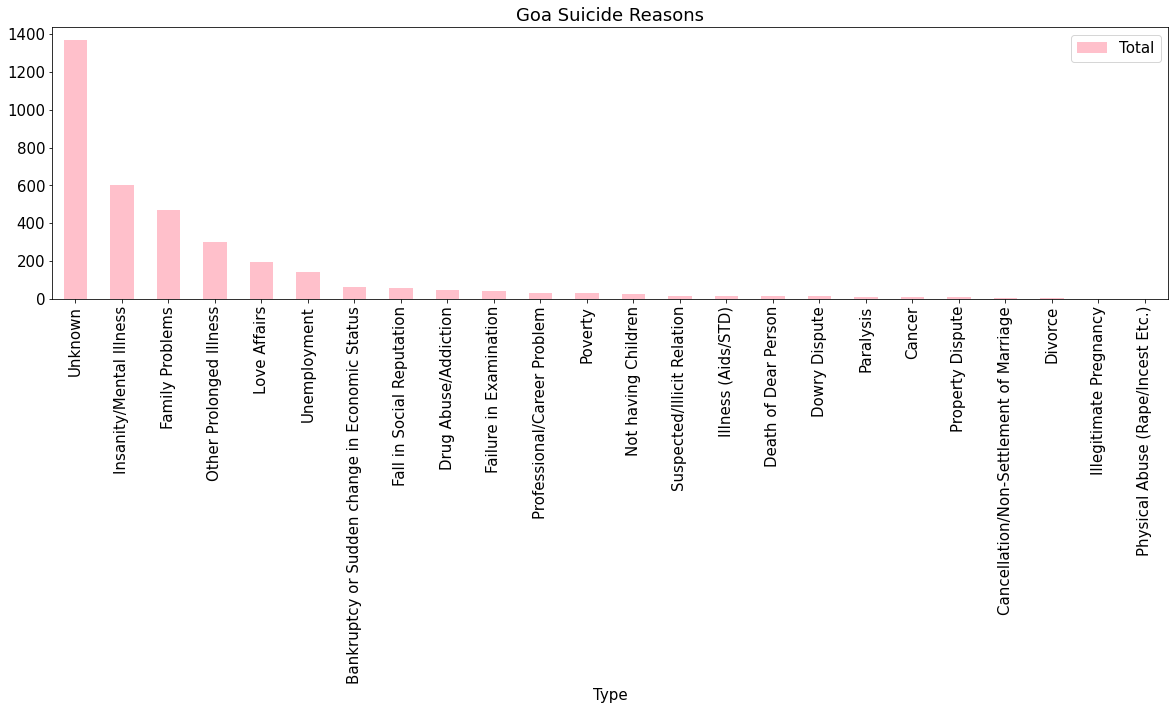

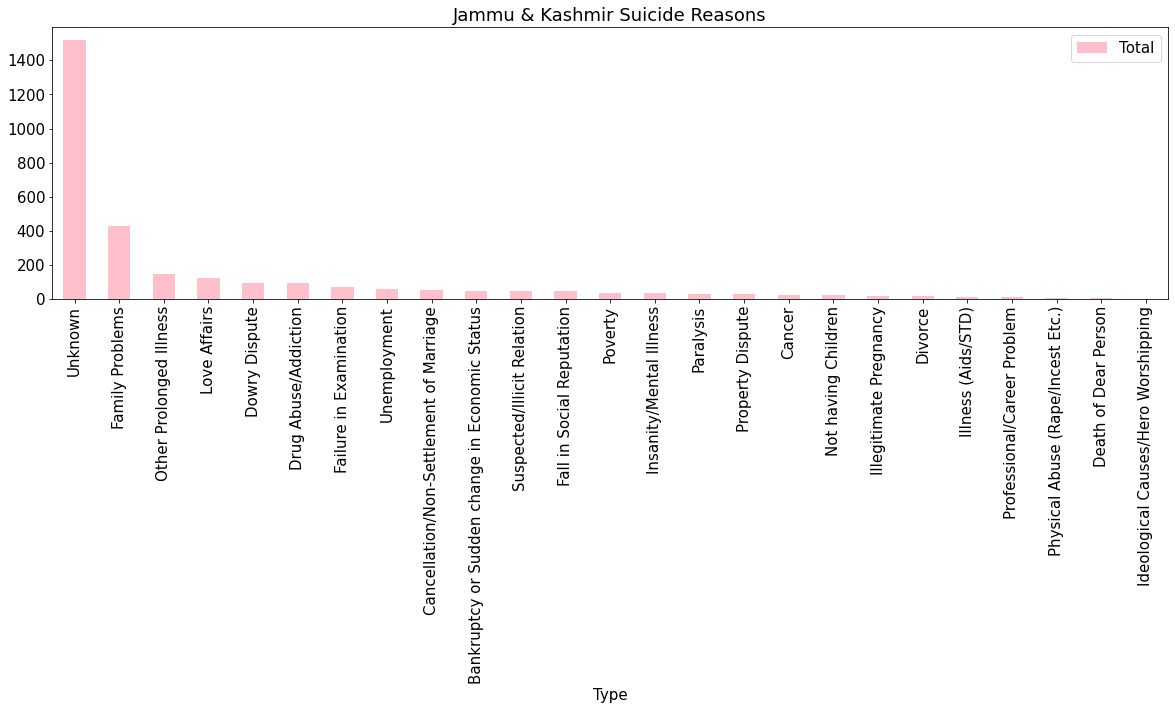

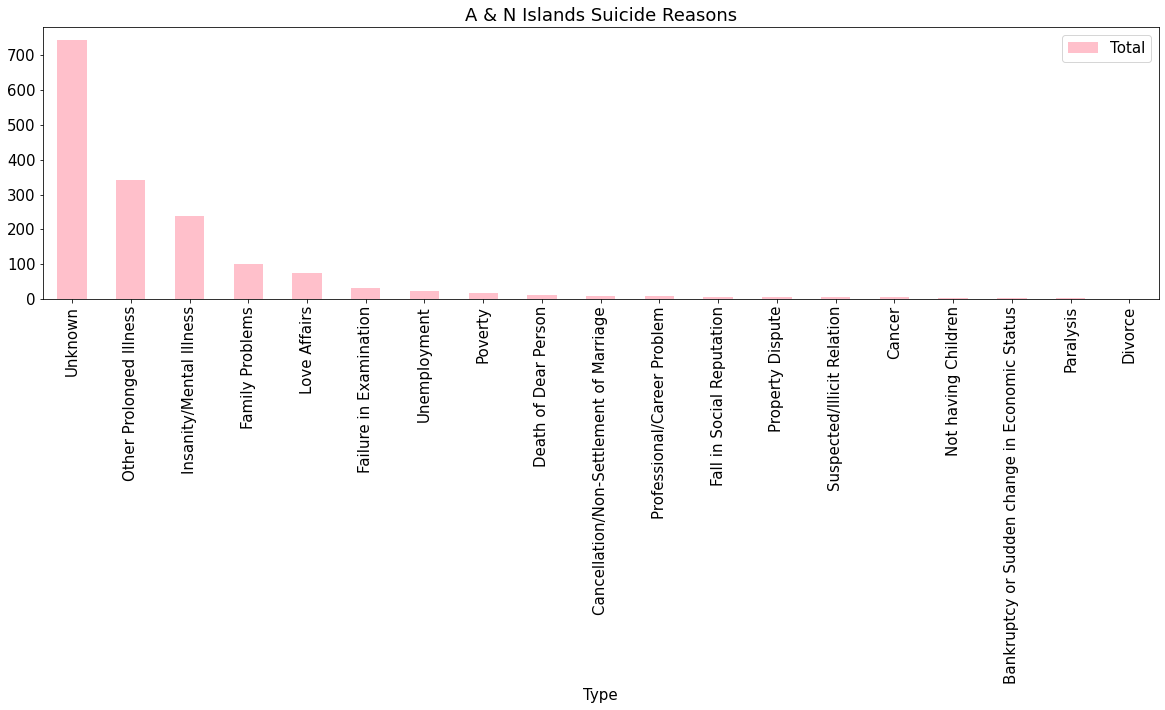

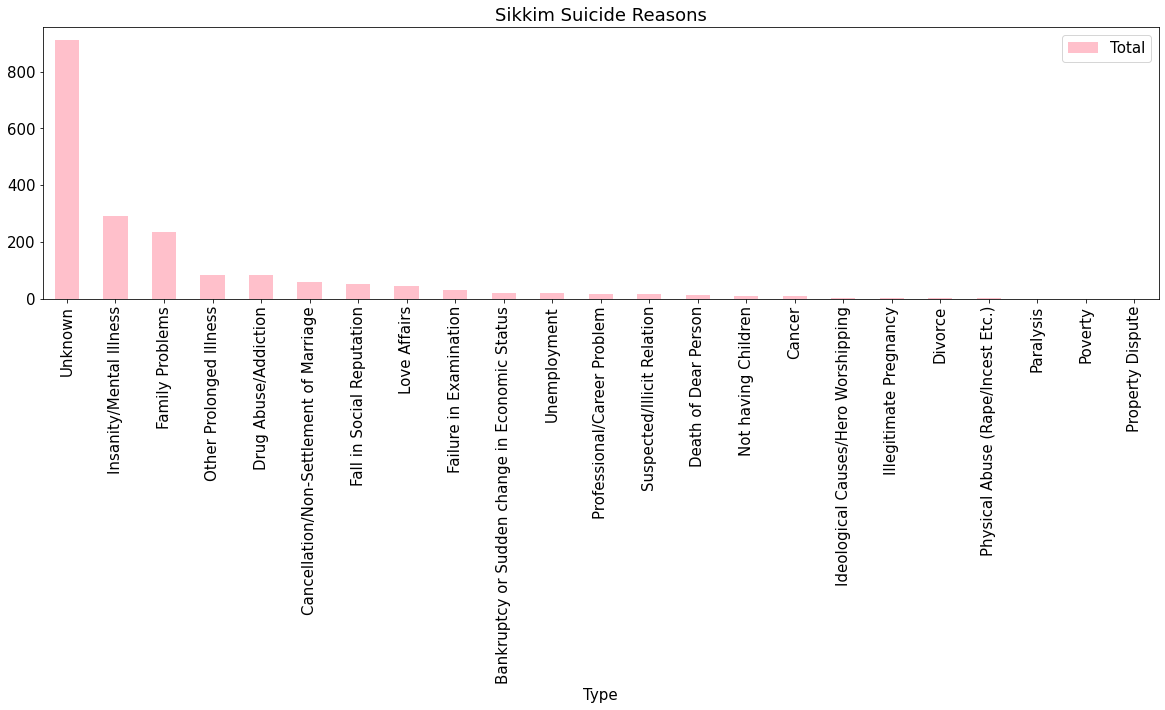

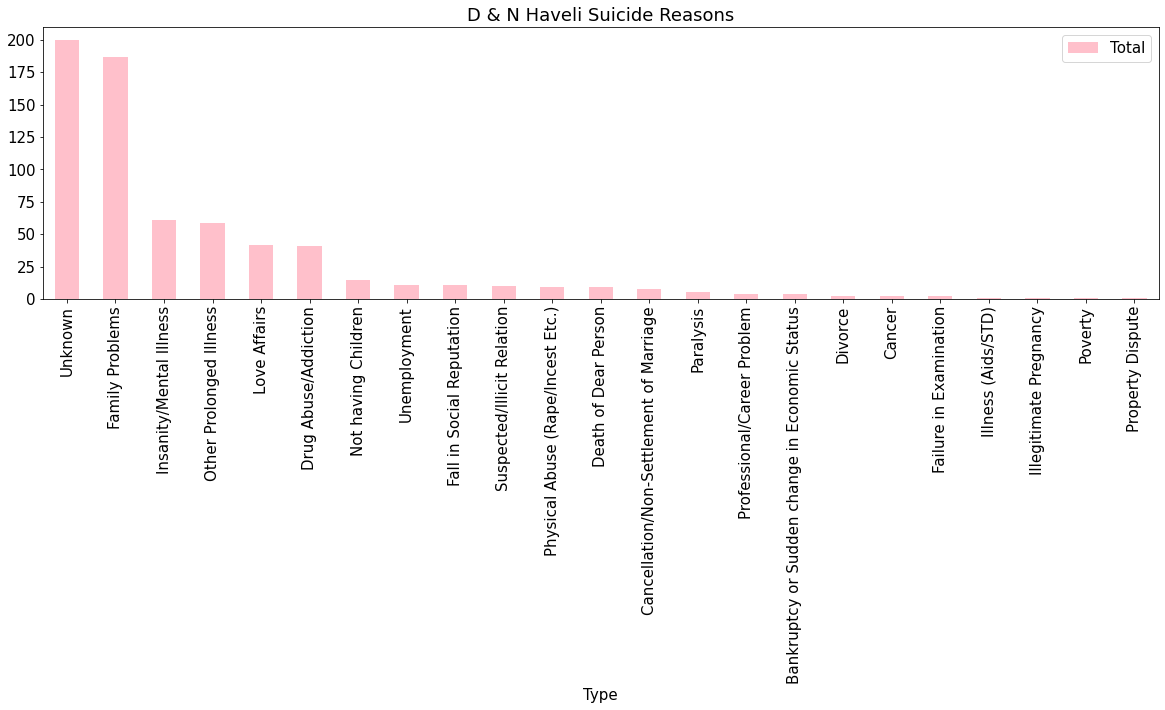

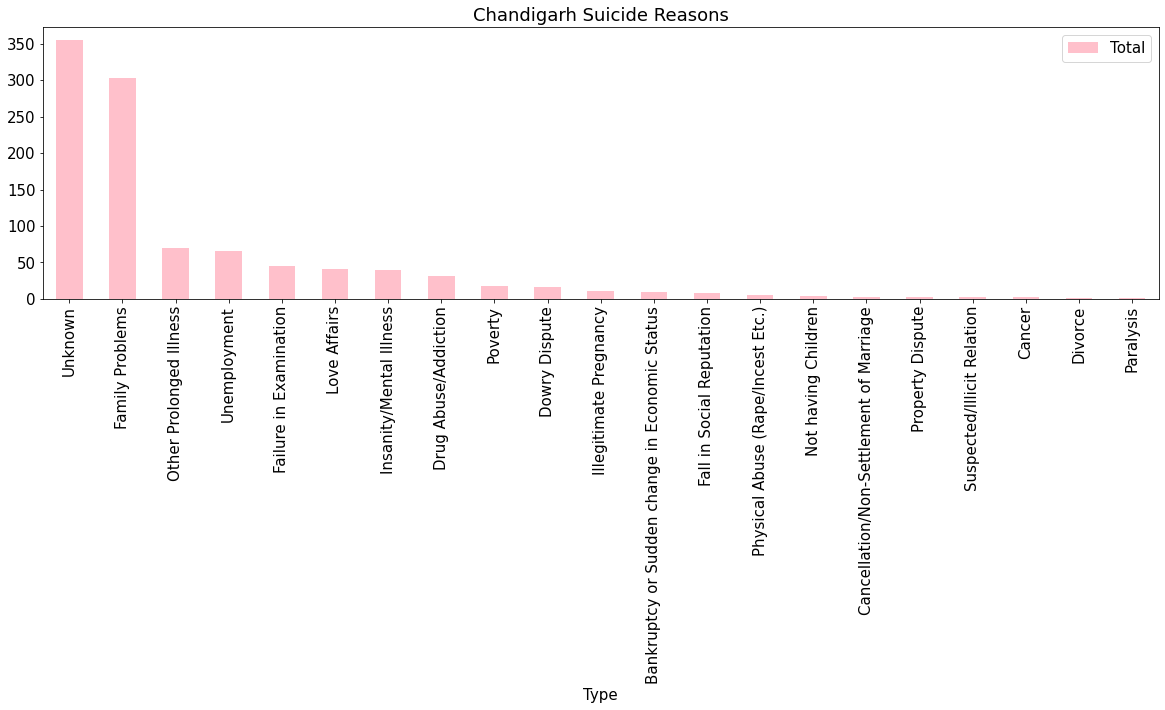

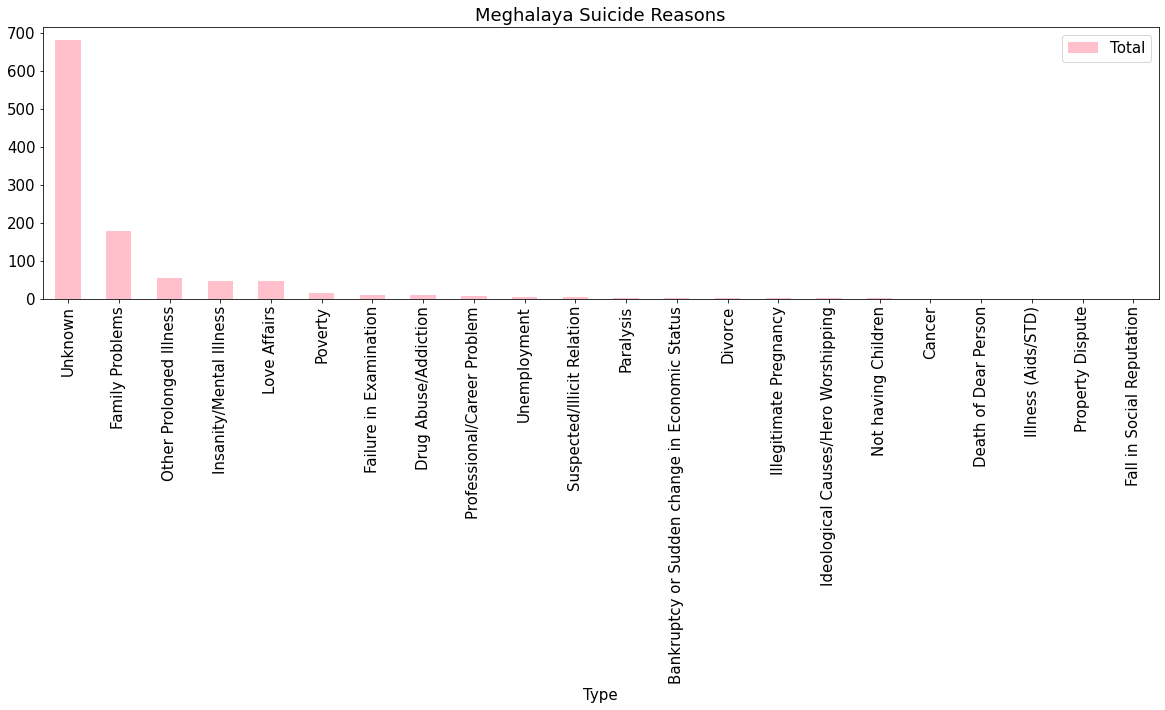

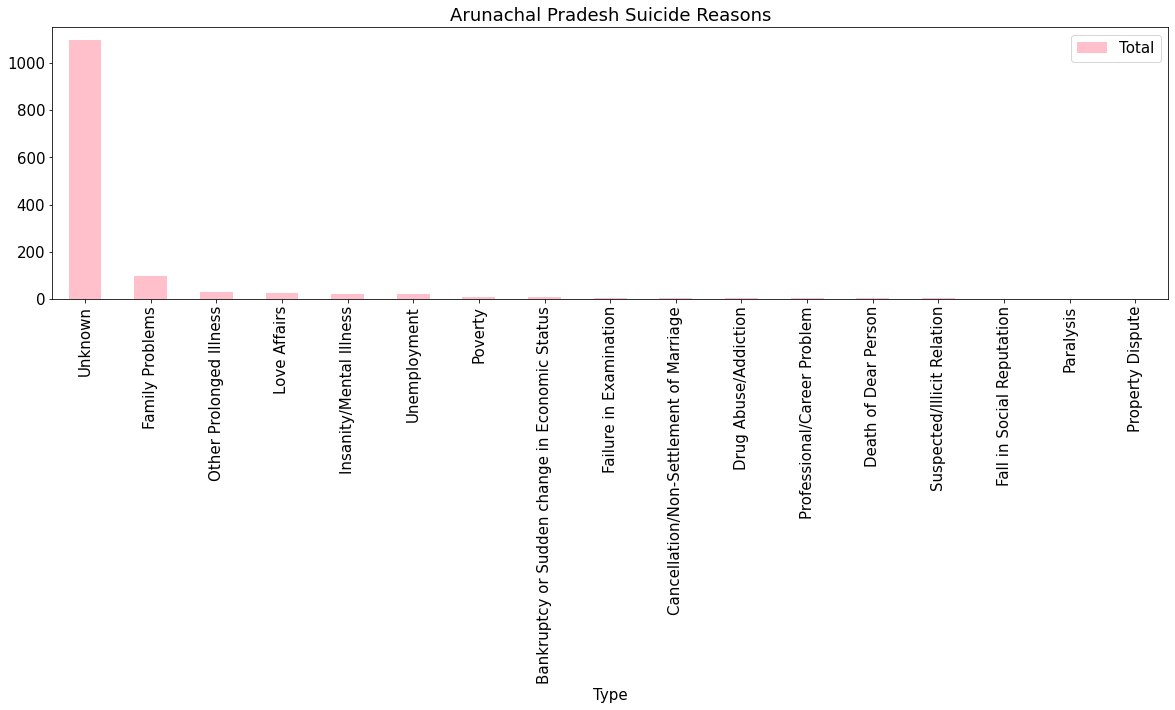

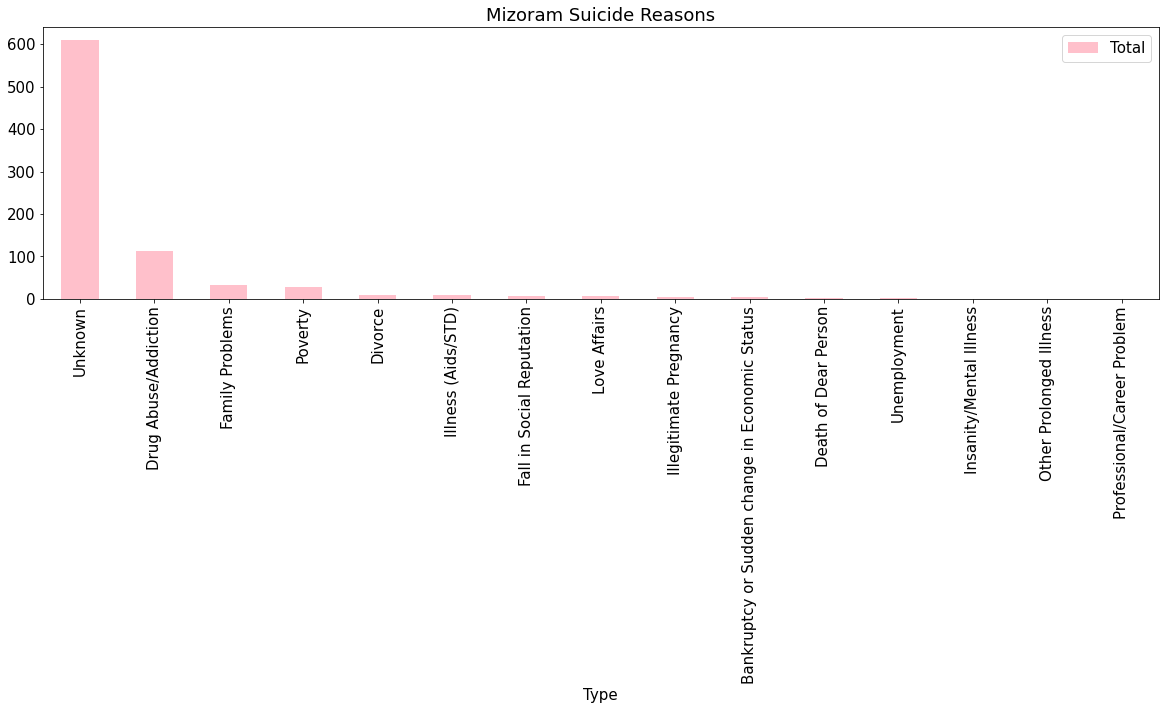

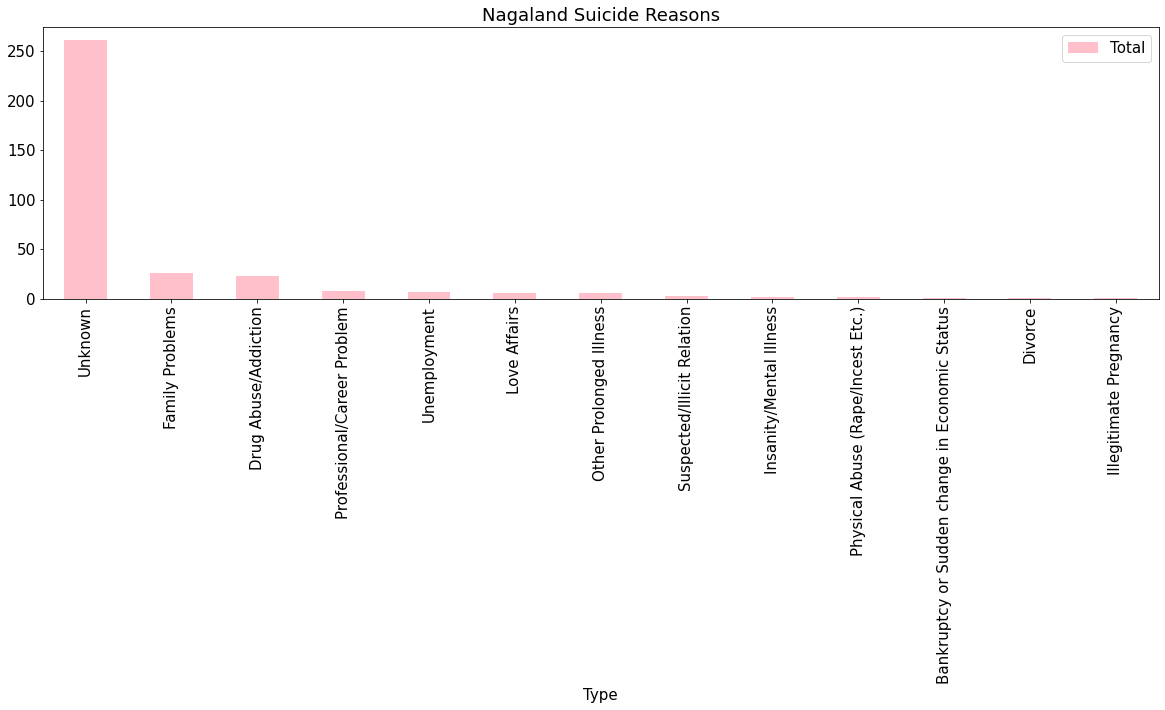

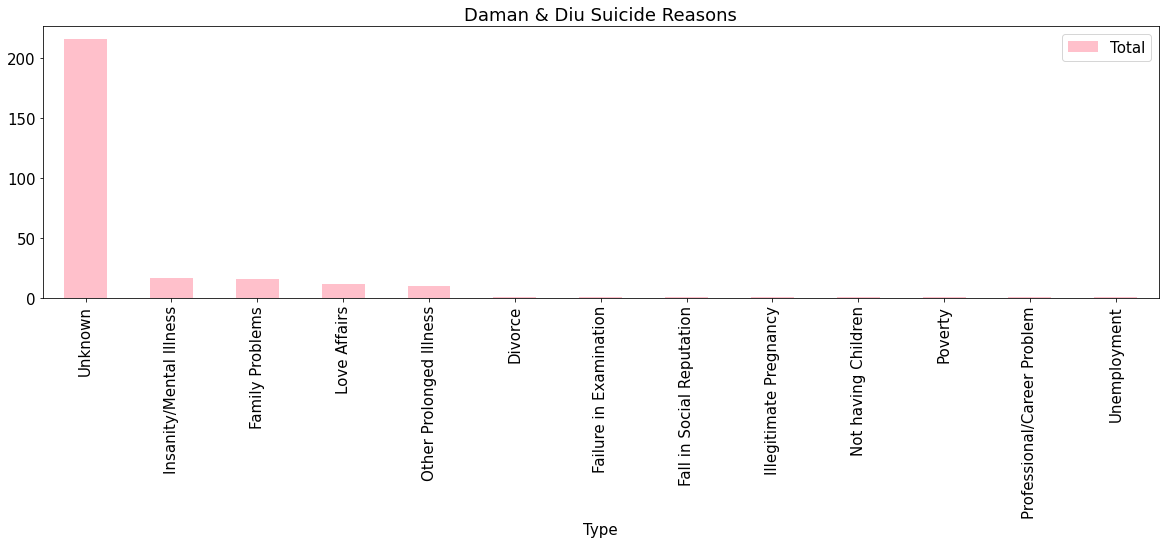

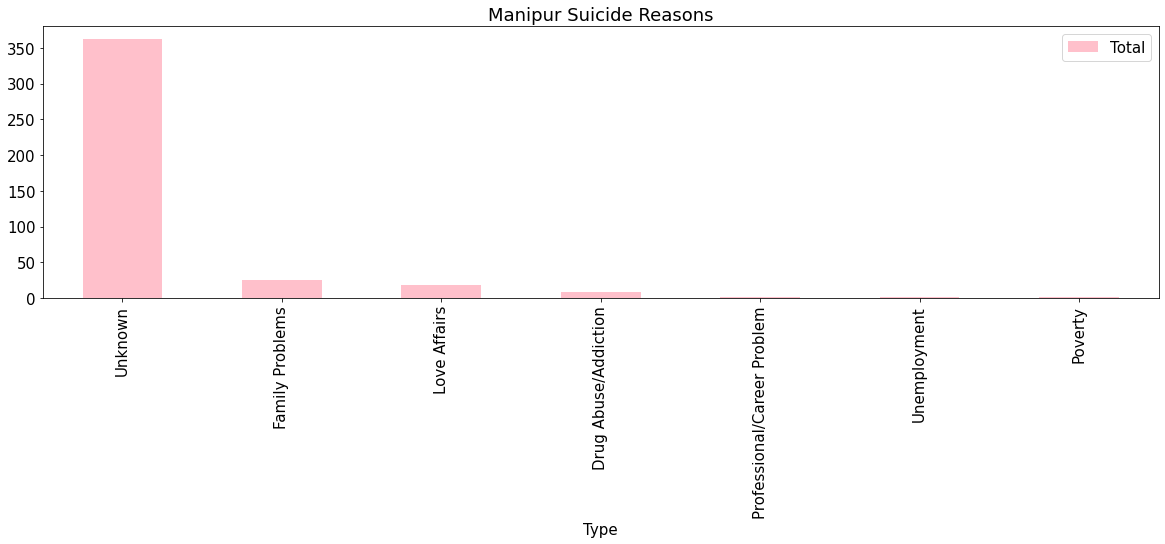

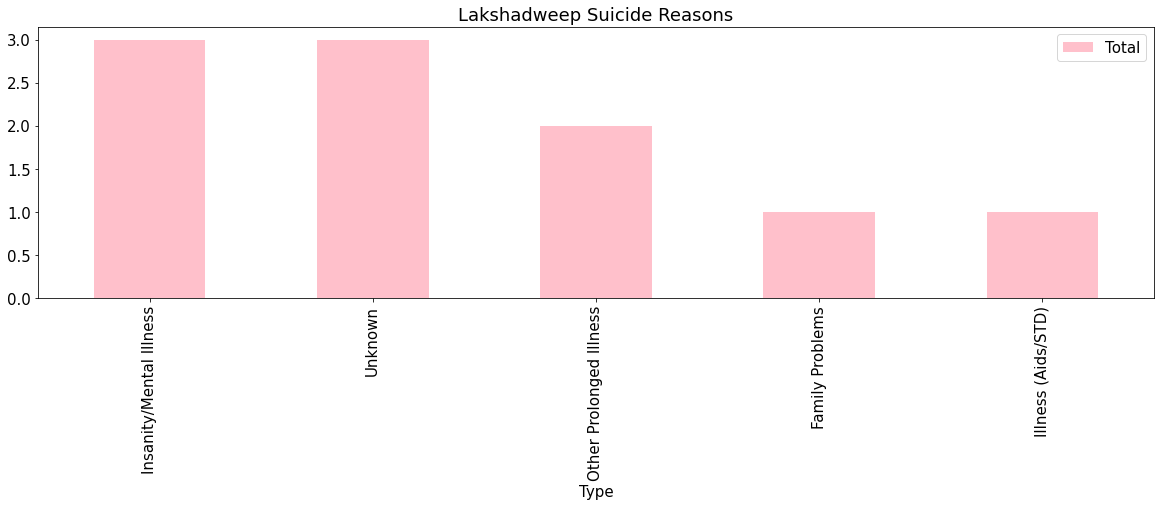

In [22]:
states_suicide_df = suicide_reason[['Type','State','Total']]
states = list(states_suicide_df['State'].value_counts().index)
for state in states:
    each_state = states_suicide_df[states_suicide_df['State'] == state ].groupby('Type').sum().sort_values('Total', ascending = False)
    each_state.plot(kind = 'bar', figsize = (20,5), title = state + ' Suicide Reasons',color = 'pink')
    plt.show()

## Year - Suicide

In [23]:
yearwise = suicide_df[['Year','Total']].groupby('Year').sum().reset_index()
yearwise.sample(10)

Year   Total
5   2006  354319
4   2005  341717
3   2004  340955
9   2010  403728
8   2009  381127
2   2003  332516
7   2008  374980
1   2002  331146
6   2007  367845
10  2011  405989

In [24]:
yearwise = yearwise.sort_values('Total',ascending = False)

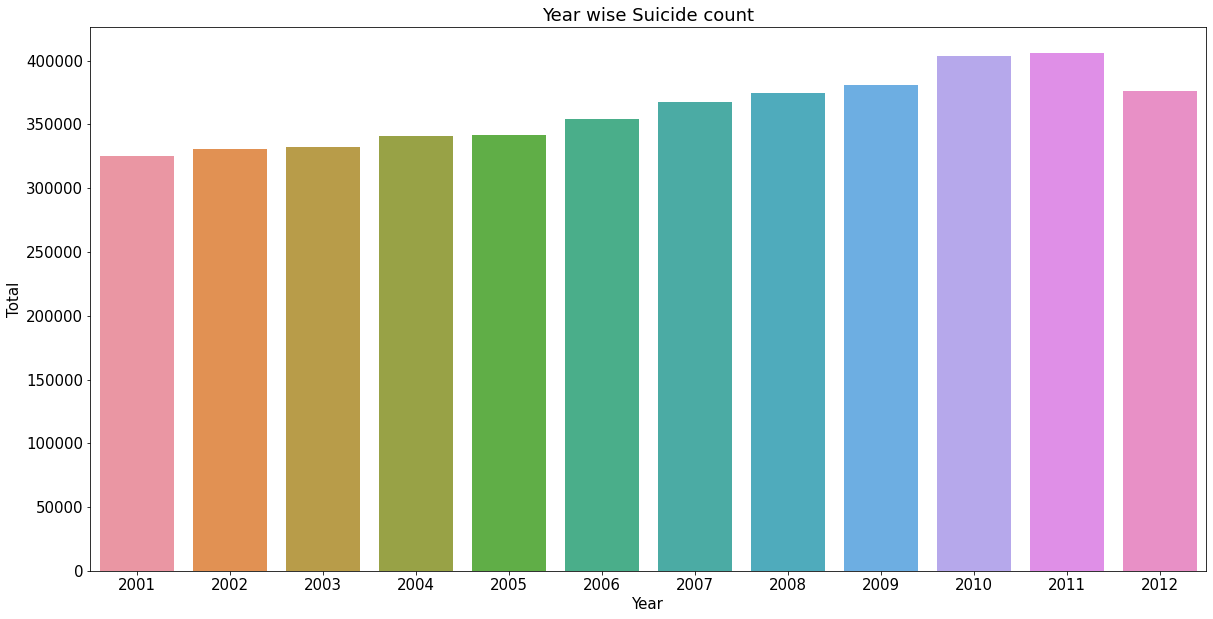

In [25]:
# Visualization
plt.figure(figsize= (20,10)) 
plt.rcParams.update({'font.size':15})
sns.barplot(x ='Year', y ='Total', data = yearwise)
plt.title('Year wise Suicide count')
plt.show()

In [26]:
print('Maximum Suicide recorded : \n')
print(yearwise[yearwise['Total']==yearwise['Total'].max()].set_index('Year'))

Maximum Suicide recorded : 

       Total
Year        
2011  405989


In [27]:
print('Minimum Suicide recorded : \n')
print(yearwise[yearwise['Total']==yearwise['Total'].min()].set_index('Year'))

Minimum Suicide recorded : 

       Total
Year        
2001  325428


In [28]:
# rate = {(max -min)/min}*100

rate_of_increment = (yearwise['Total'].max()-yearwise['Total'].min())/yearwise['Total'].min()*100
print('Rate of Increment : {} %'.format(rate_of_increment))
print('Rate of Increment(Rounded) : {} %'.format(round(rate_of_increment)))

Rate of Increment : 24.755399043720885 %
Rate of Increment(Rounded) : 25 %


## Year - Gender - Suicide

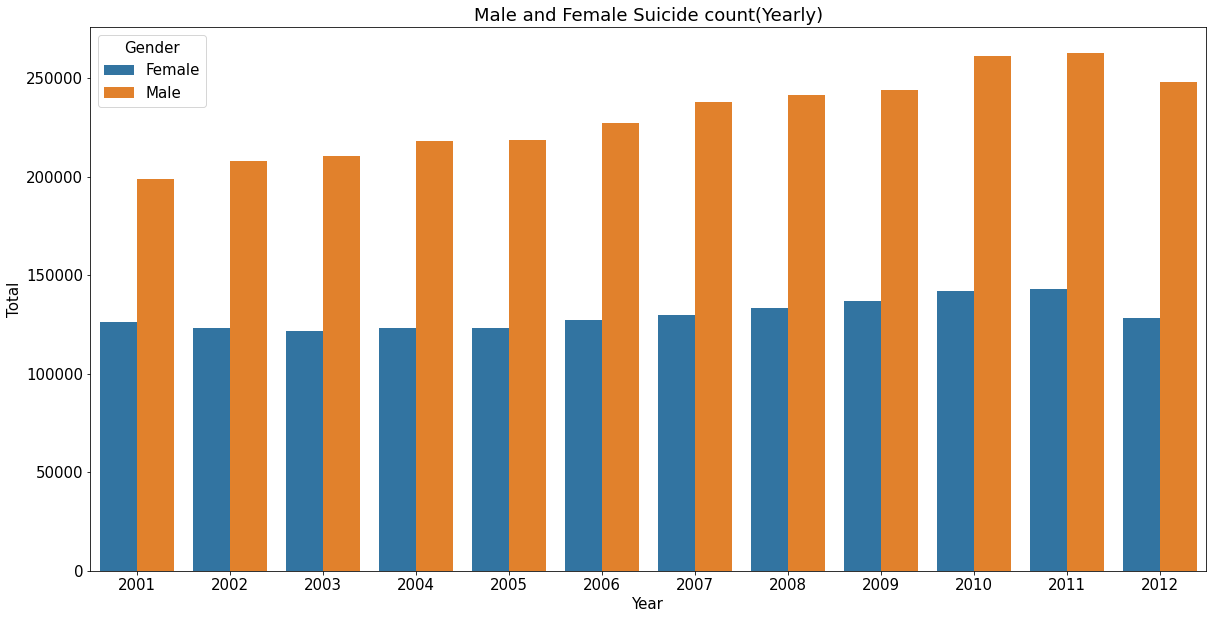

In [29]:
# Visualization
yearwise_gender = suicide_df[['Year','Gender','Total']].groupby(['Year','Gender']).sum()
yearwise_gender = yearwise_gender.reset_index()
plt.figure(figsize= (20,10)) 
plt.rcParams.update({'font.size':15})
sns.barplot(x ='Year', y ='Total',hue='Gender',data = yearwise_gender)
plt.title('Male and Female Suicide count(Yearly)')
plt.show()

## Reasons for suicide

In [30]:
reasonwise = suicide_reason[['Type','Total']].groupby('Type').sum()
reasonwise = reasonwise.sort_values('Total',ascending = False)
reasonwise = reasonwise.reset_index()

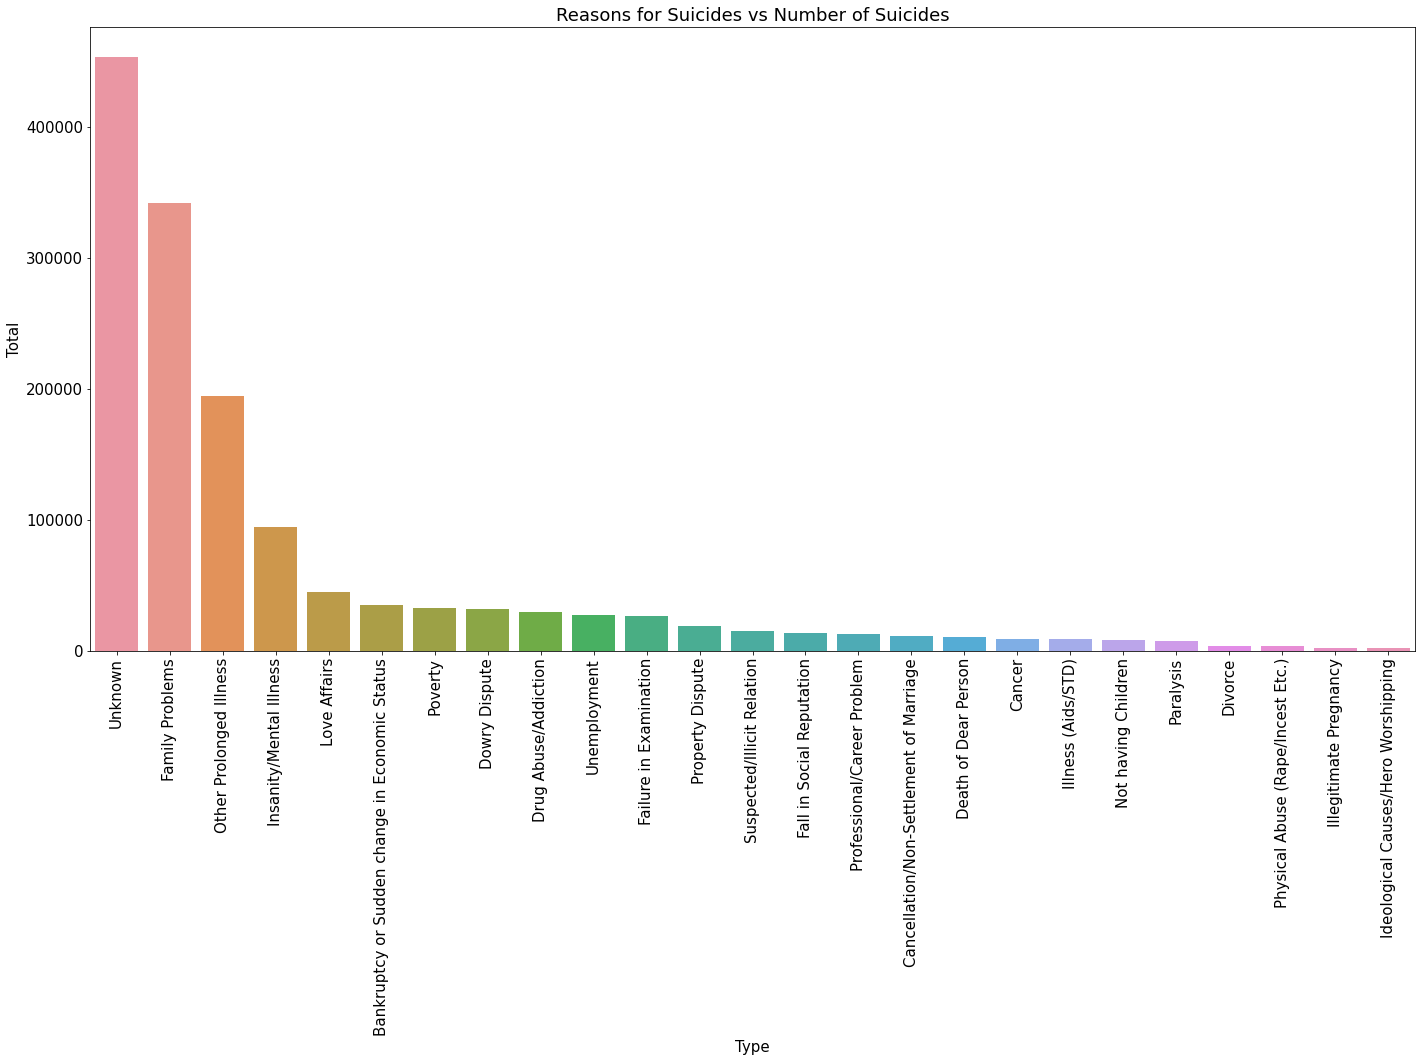

In [31]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize= (20,15))
sns.barplot(x ='Type', y ='Total', data = reasonwise)
plt.title('Reasons for Suicides vs Number of Suicides')    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Suicide Reasons - Gender

In [32]:
# suicide Reasons for Male

gender_reason_df = suicide_reason[['Type','Gender','Total']]
male_df = gender_reason_df[gender_reason_df['Gender'] == 'Male']
male_df =  male_df.groupby('Type').sum().reset_index()
male_df_1 = male_df.sort_values('Total', ascending = False)
male_df_1 = male_df_1.reset_index(drop = True)
male_df

Type   Total
0   Bankruptcy or Sudden change in Economic Status   31175
1          Cancellation/Non-Settlement of Marriage    5170
2                                           Cancer    6180
3                             Death of Dear Person    5614
4                                          Divorce    1598
5                                    Dowry Dispute     764
6                             Drug Abuse/Addiction   28841
7                           Failure in Examination   14951
8                        Fall in Social Reputation    8767
9                                  Family Problems  208771
10             Ideological Causes/Hero Worshipping    1342
11                          Illegitimate Pregnancy     103
12                              Illness (Aids/STD)    5831
13                         Insanity/Mental Illness   60877
14                                    Love Affairs   23700
15                             Not having Children    2521
16                         Other Prolonged Illness  125493
17                                       Paralysis    5002
18               Physical Abuse (Rape/Incest Etc.)    1330
19                                         Poverty   24779
20                     Professional/Career Problem   10958
21                                Property Dispute   14051
22                      Suspected/Illicit Relation    6818
23                                    Unemployment   23617
24                                         Unknown  304985

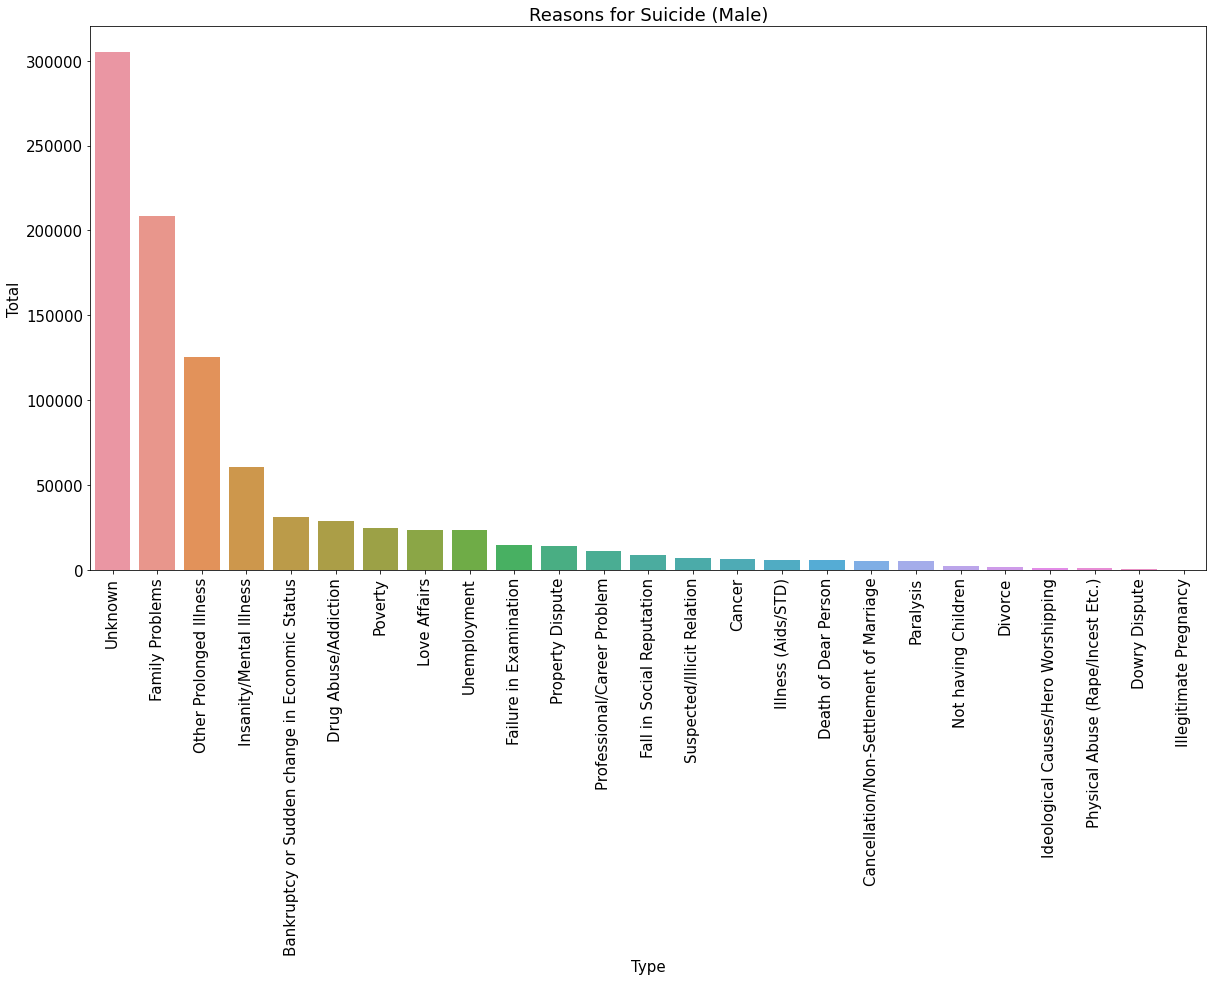

In [33]:
#Visualization

plt.figure(figsize=(20,10))
sns.barplot(x='Type',y='Total',data = male_df_1)
plt.xticks(rotation = 90)
plt.title("Reasons for Suicide (Male)")
plt.show()

In [34]:
# suicide Reasons for Female

female_df = gender_reason_df[gender_reason_df['Gender'] == 'Female']
female_df = female_df.groupby('Type').sum().reset_index()
female_df_1 = female_df.sort_values('Total', ascending = False)
female_df_1 = female_df_1.reset_index(drop = True)
female_df

Type   Total
0   Bankruptcy or Sudden change in Economic Status    4235
1          Cancellation/Non-Settlement of Marriage    6126
2                                           Cancer    2878
3                             Death of Dear Person    4707
4                                          Divorce    2535
5                                    Dowry Dispute   31206
6                             Drug Abuse/Addiction    1205
7                           Failure in Examination   12054
8                        Fall in Social Reputation    4697
9                                  Family Problems  133181
10             Ideological Causes/Hero Worshipping     776
11                          Illegitimate Pregnancy    2391
12                              Illness (Aids/STD)    2892
13                         Insanity/Mental Illness   33352
14                                    Love Affairs   21339
15                             Not having Children    6067
16                         Other Prolonged Illness   69072
17                                       Paralysis    2284
18               Physical Abuse (Rape/Incest Etc.)    2662
19                                         Poverty    7905
20                     Professional/Career Problem    1596
21                                Property Dispute    4601
22                      Suspected/Illicit Relation    8093
23                                    Unemployment    3748
24                                         Unknown  148134

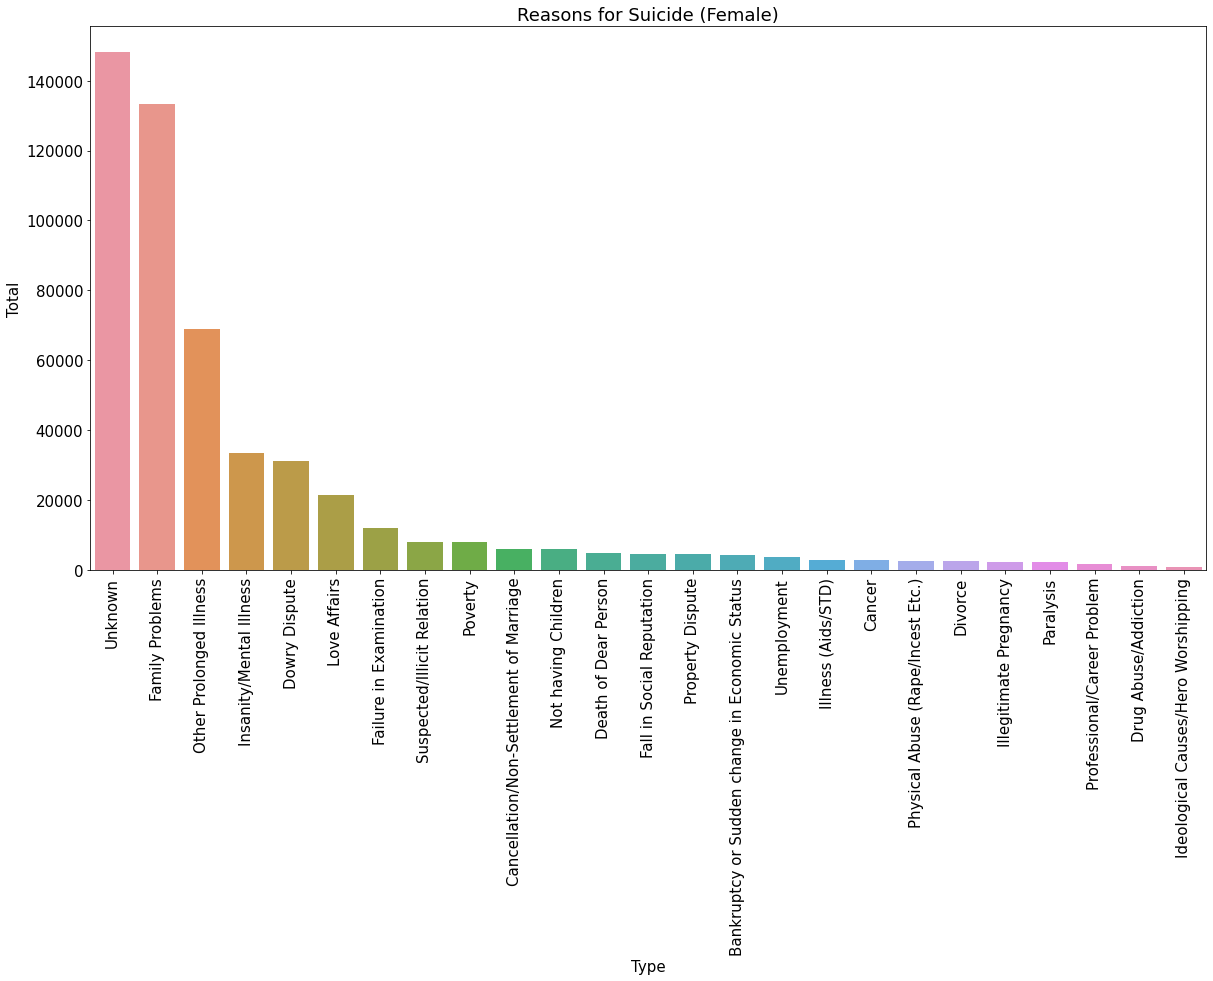

In [35]:
#Visualization

plt.figure(figsize=(20,10))
sns.barplot(x='Type',y='Total',data = female_df_1)
plt.xticks(rotation = 90)
plt.title("Reasons for Suicide (Female)")
plt.show()

In [36]:
male_female_df = pd.concat([male_df,female_df],axis=1)
male_female_df.columns = ['Type','Male','Type_','Female']
male_female_df.drop('Type_',axis=1,inplace= True)
male_female_df

Type    Male  Female
0   Bankruptcy or Sudden change in Economic Status   31175    4235
1          Cancellation/Non-Settlement of Marriage    5170    6126
2                                           Cancer    6180    2878
3                             Death of Dear Person    5614    4707
4                                          Divorce    1598    2535
5                                    Dowry Dispute     764   31206
6                             Drug Abuse/Addiction   28841    1205
7                           Failure in Examination   14951   12054
8                        Fall in Social Reputation    8767    4697
9                                  Family Problems  208771  133181
10             Ideological Causes/Hero Worshipping    1342     776
11                          Illegitimate Pregnancy     103    2391
12                              Illness (Aids/STD)    5831    2892
13                         Insanity/Mental Illness   60877   33352
14                                    Love Affairs   23700   21339
15                             Not having Children    2521    6067
16                         Other Prolonged Illness  125493   69072
17                                       Paralysis    5002    2284
18               Physical Abuse (Rape/Incest Etc.)    1330    2662
19                                         Poverty   24779    7905
20                     Professional/Career Problem   10958    1596
21                                Property Dispute   14051    4601
22                      Suspected/Illicit Relation    6818    8093
23                                    Unemployment   23617    3748
24                                         Unknown  304985  148134

## Male - Female Comparision 

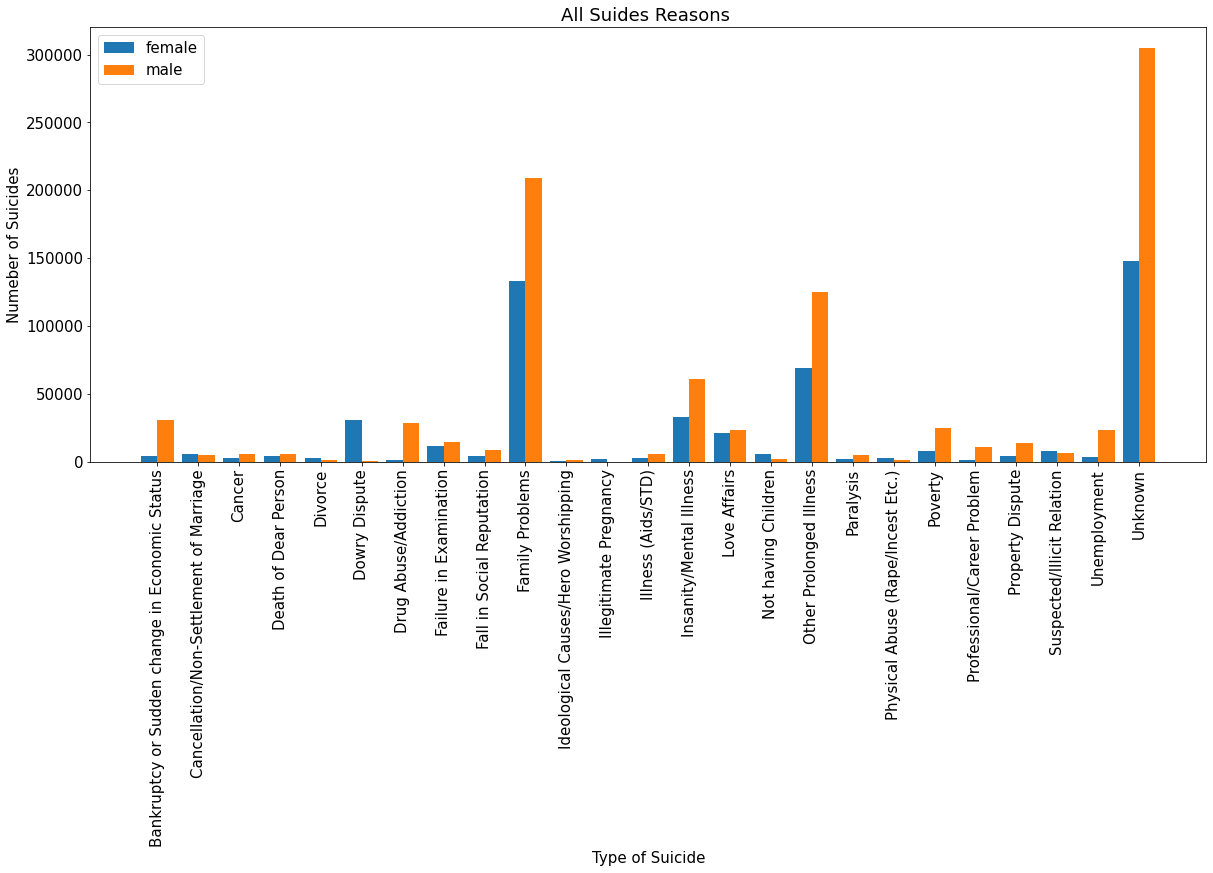

In [37]:
fig = plt.figure(figsize=(20,8))
N= len(male_female_df)
ind = np.arange(N)
width = 0.4 
category = list(male_female_df['Type'])
plt.bar(x = ind, height = 'Female', data = male_female_df, width = width,label = 'female')
plt.bar(x = ind+width, height = 'Male', data = male_female_df, width = width,label='male')
plt.xlabel("Type of Suicide") 
plt.ylabel("Numeber of Suicides")
plt.title("All Suides Reasons ")
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.legend(loc='best')
plt.show()

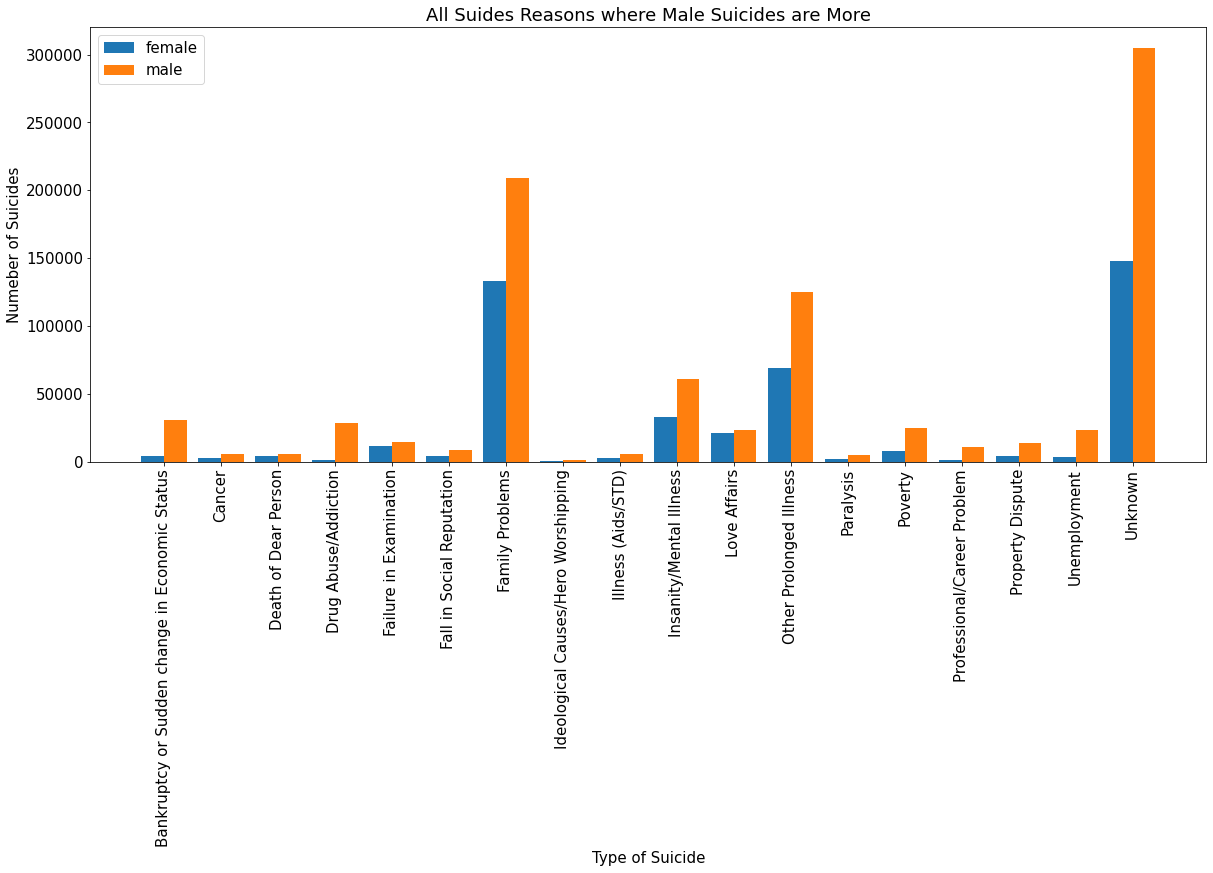

In [38]:
extra_male = male_female_df[male_female_df['Male'] > male_female_df['Female']]
fig = plt.figure(figsize=(20,8))
N= len(extra_male)
ind = np.arange(N)
width = 0.4 
category = list(extra_male['Type'])
plt.bar(x = ind, height = 'Female', data = extra_male, width = width,label = 'female')
plt.bar(x = ind+width, height = 'Male', data = extra_male, width = width,label='male')
plt.xlabel("Type of Suicide") 
plt.ylabel("Numeber of Suicides")
plt.title("All Suides Reasons where Male Suicides are More")
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.legend(loc='best')
plt.show()

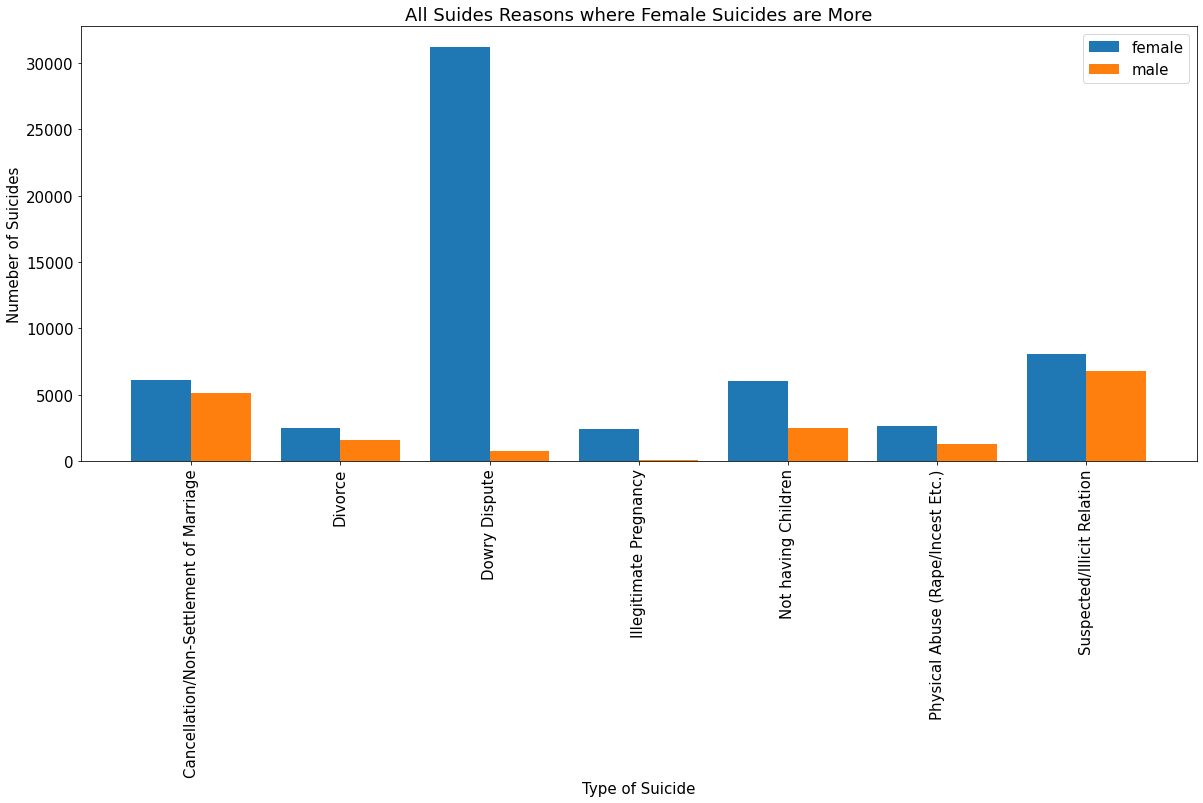

In [39]:
extra_female = male_female_df[male_female_df['Male'] < male_female_df['Female']]
fig = plt.figure(figsize=(20,8))
N= len(extra_female)
ind = np.arange(N)
width = 0.4 
category = list(extra_female['Type'])
plt.bar(x = ind, height = 'Female', data = extra_female, width = width,label = 'female')
plt.bar(x = ind+width, height = 'Male', data = extra_female, width = width,label='male')
plt.xlabel("Type of Suicide") 
plt.ylabel("Numeber of Suicides")
plt.title("All Suides Reasons where Female Suicides are More")
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.legend(loc='best')
plt.show()

## Conclusion 
## 1. Men seem to be more vulnerable to commit suicide
## 2. Unknown reasons are highest, That means Data collection is not effective enough
## 3. Family Problems is the known strongest reason

## Age - Suicide

In [40]:
agewise = suicide_df[['Age_group','Total']].groupby('Age_group').sum()
agewise

Total
Age_group         
0-14         98410
15-29      1534037
30-44      1471599
45-59       885177
60+         346925

In [41]:
agewise = agewise.sort_values('Total',ascending = False)
agewise = agewise.reset_index()
agewise

Age_group    Total
0     15-29  1534037
1     30-44  1471599
2     45-59   885177
3       60+   346925
4      0-14    98410

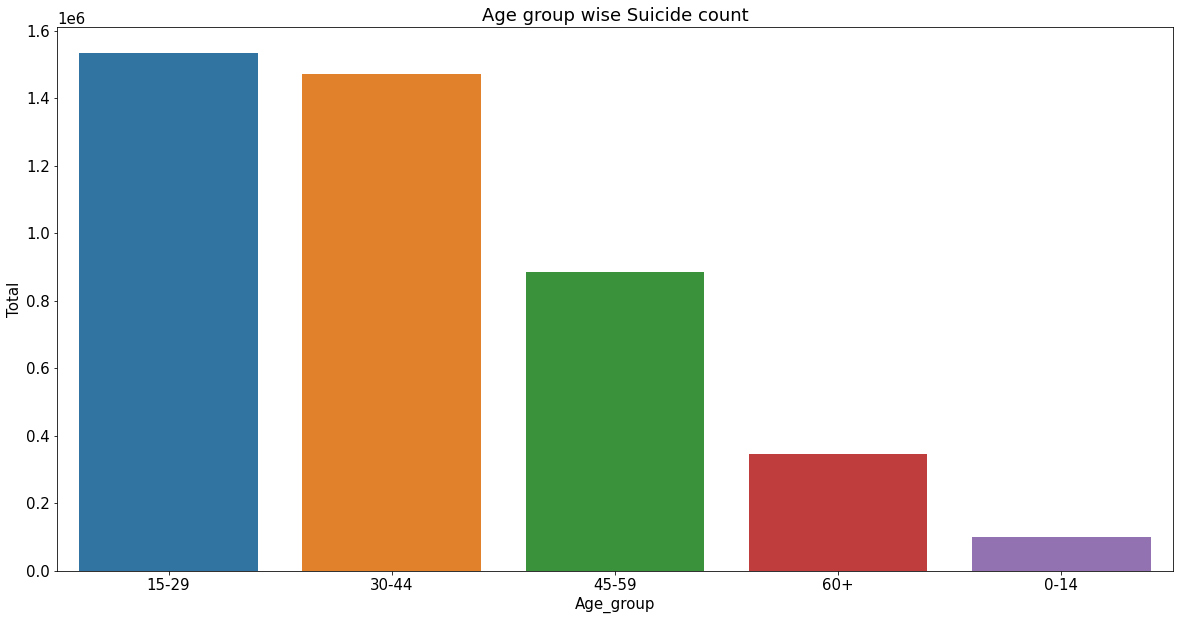

In [42]:
# Visualization
plt.figure(figsize= (20,10)) 
plt.rcParams.update({'font.size':15})
sns.barplot(x ='Age_group', y ='Total', data = agewise)
plt.title('Age group wise Suicide count')
plt.show()

## Age - Suicide Reason

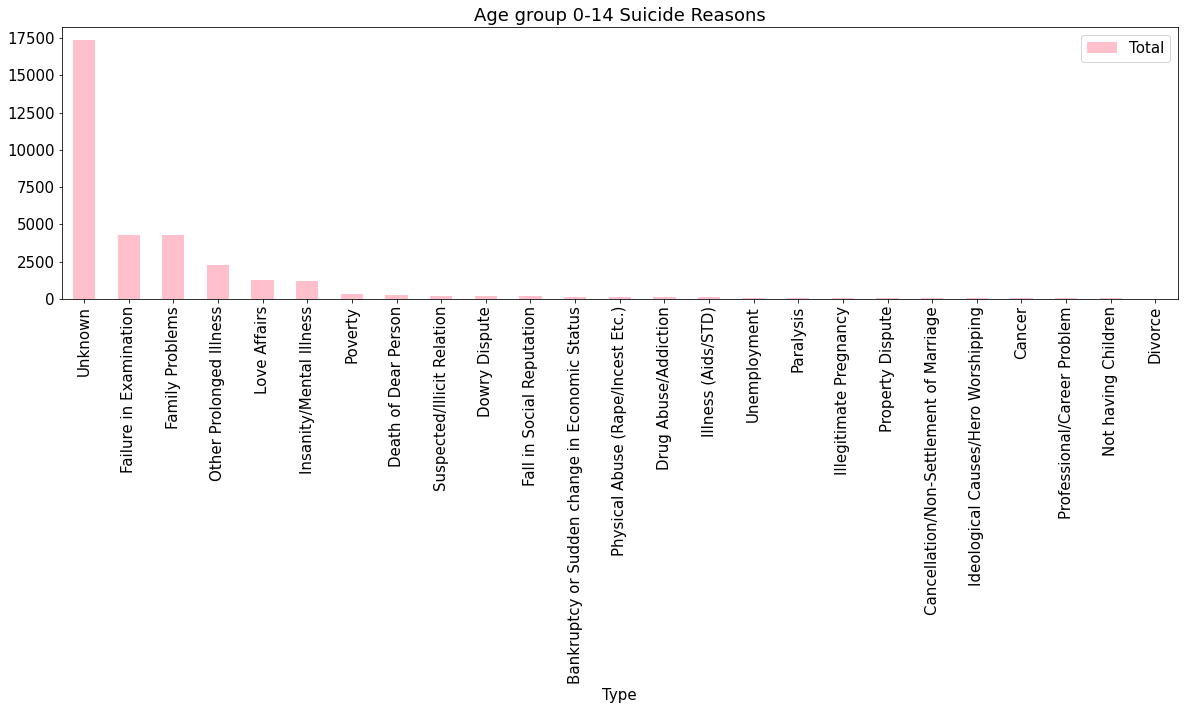

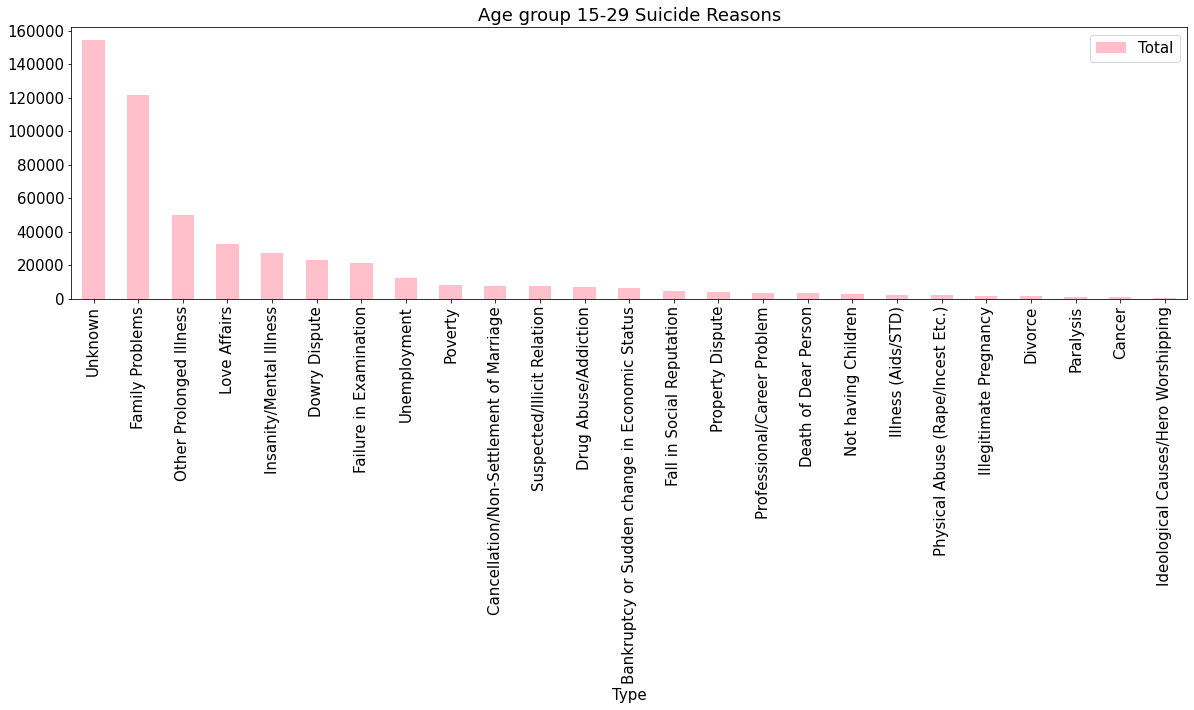

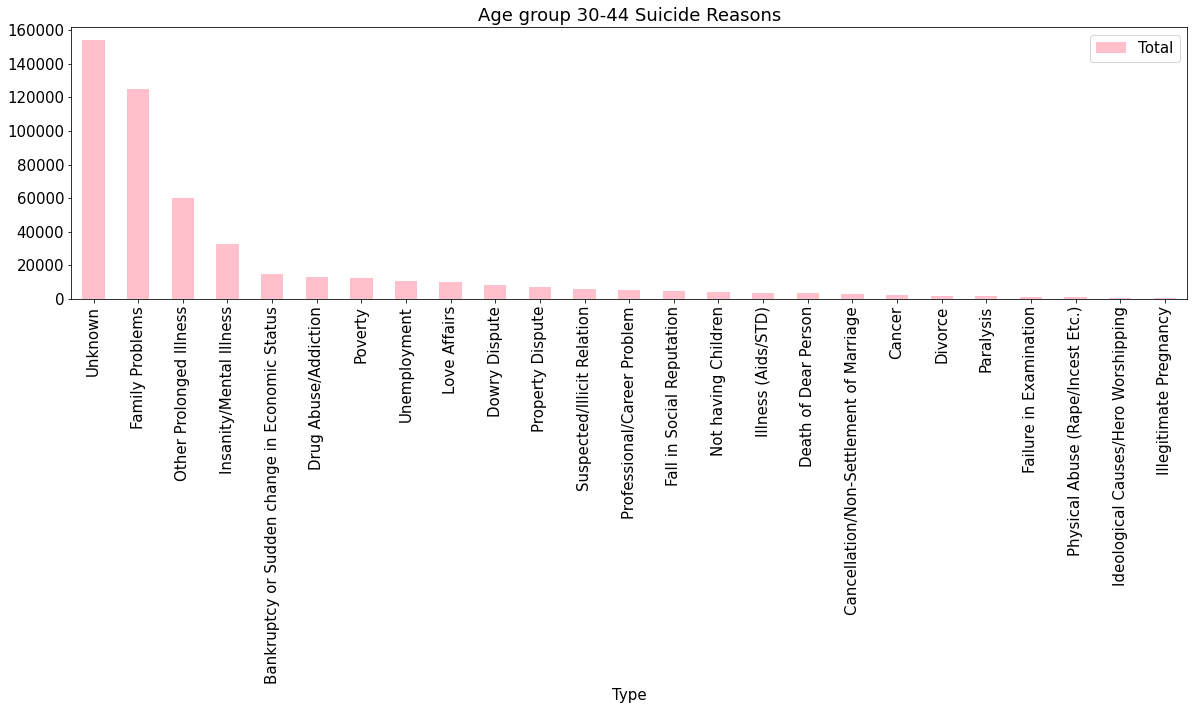

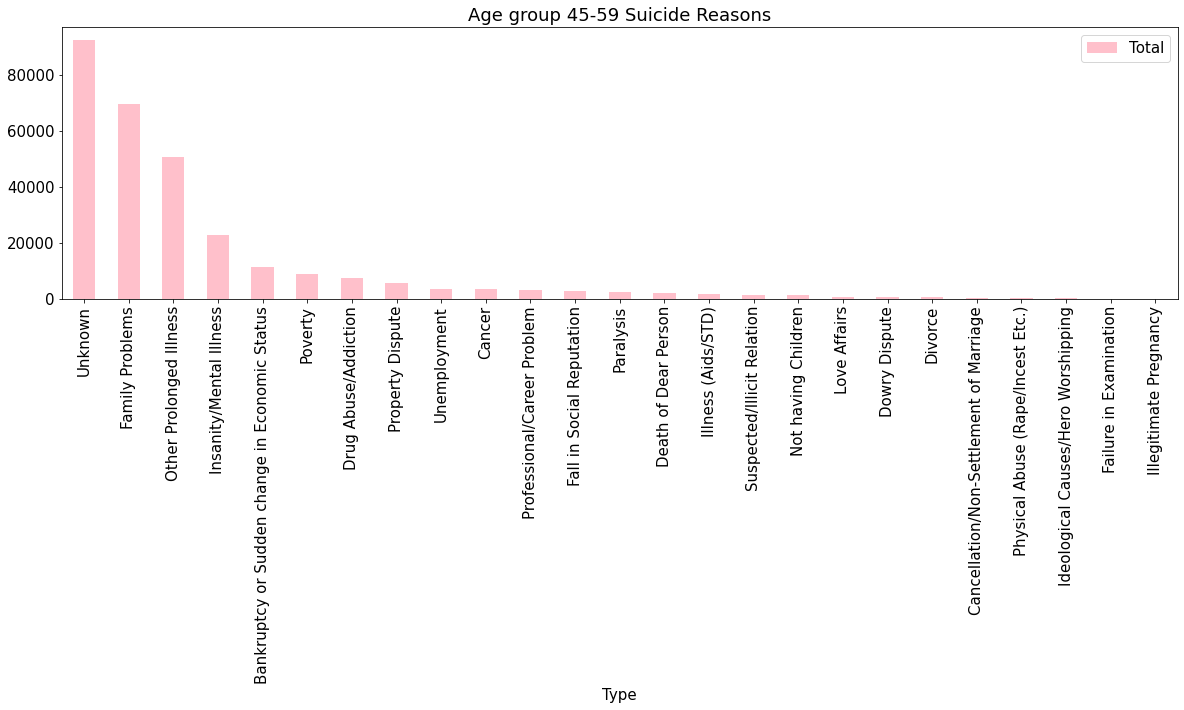

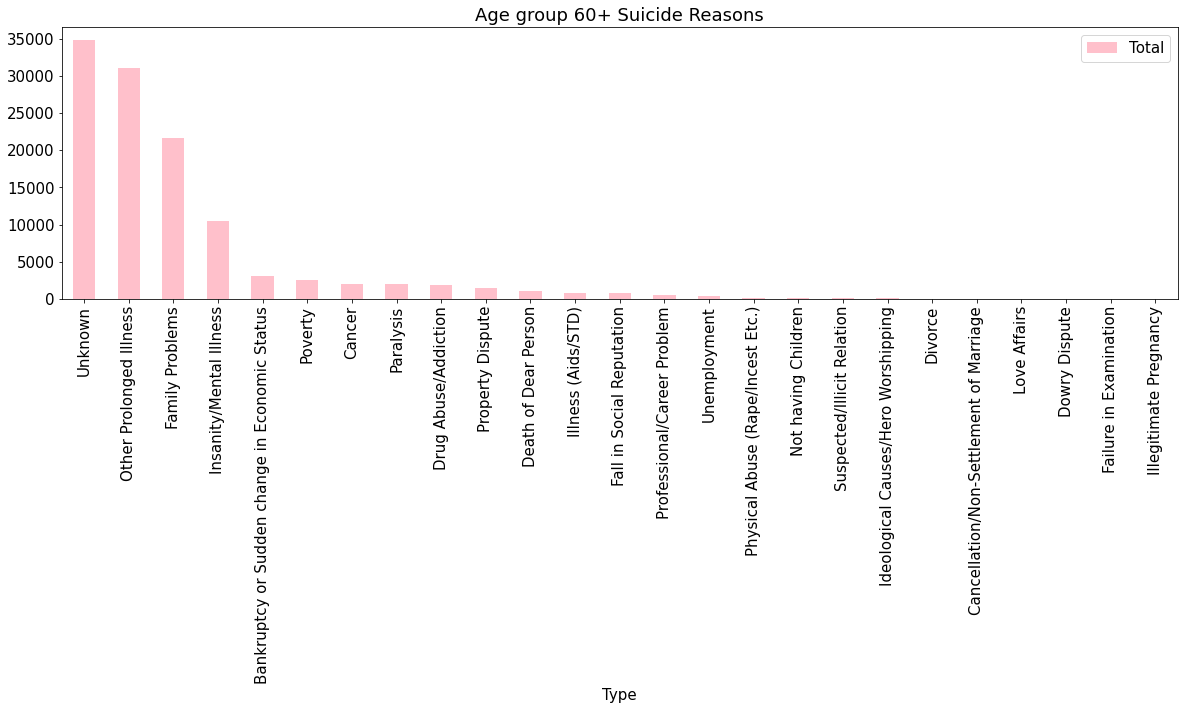

In [43]:
age_reason_df = suicide_reason[['Type','Age_group','Total']]
age_groups = list(age_reason_df['Age_group'].unique())
for age in age_groups:
    each_group = age_reason_df[age_reason_df['Age_group'] == age ].groupby('Type').sum().sort_values('Total', ascending = False)
    each_group.plot(kind = 'bar', figsize = (20,5), title = 'Age group '+ age + ' Suicide Reasons',color = 'pink')
    plt.show()

## Conclusions :

## Age group 0-14 : Failure in Examination is the second Strong reason
## Age group 0-14, 15-29 : Love affairs is one of the top 5 reasons
## Family Problems is the strongest reason in all the age groups

## Unknown reasons are highest, That means Data collection is not effective enough

## How  reasons are changing ?

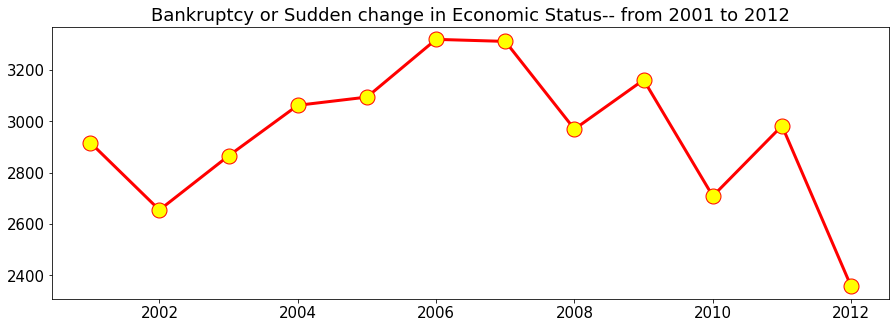

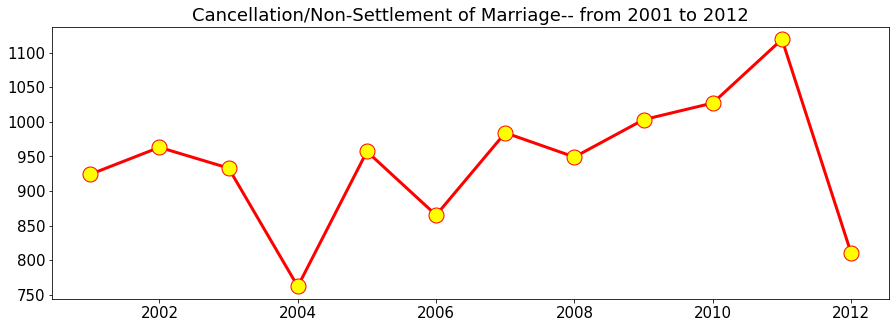

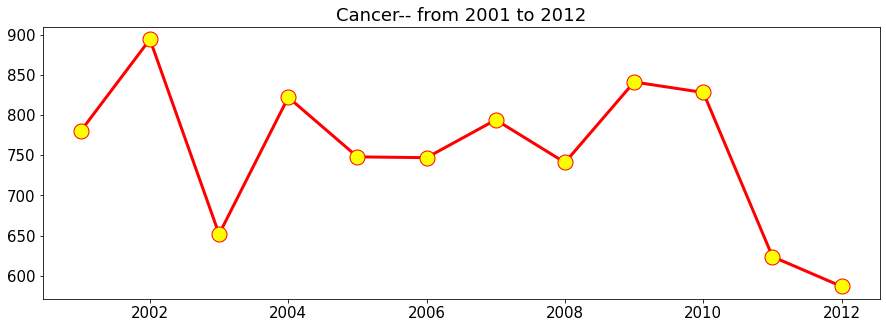

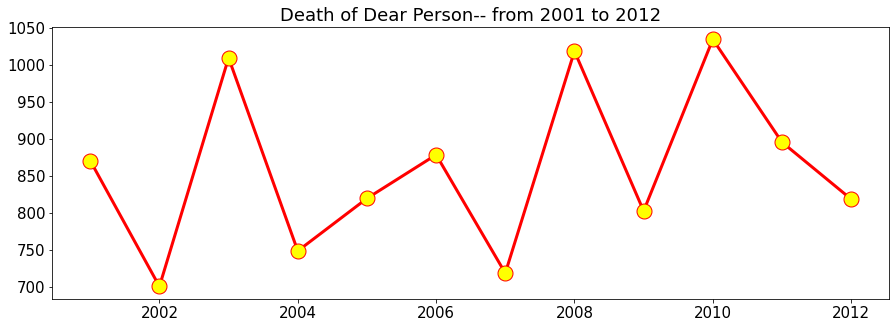

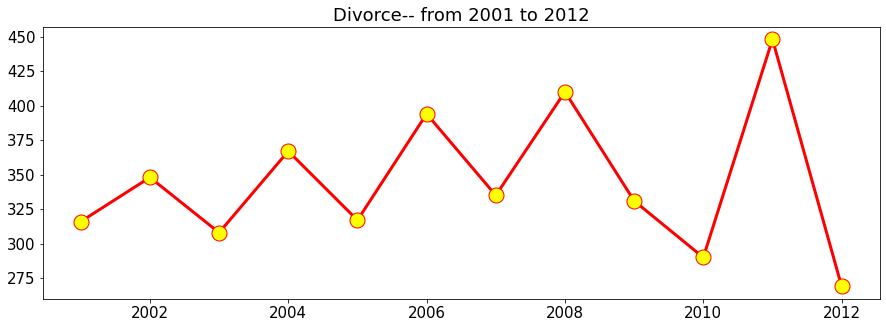

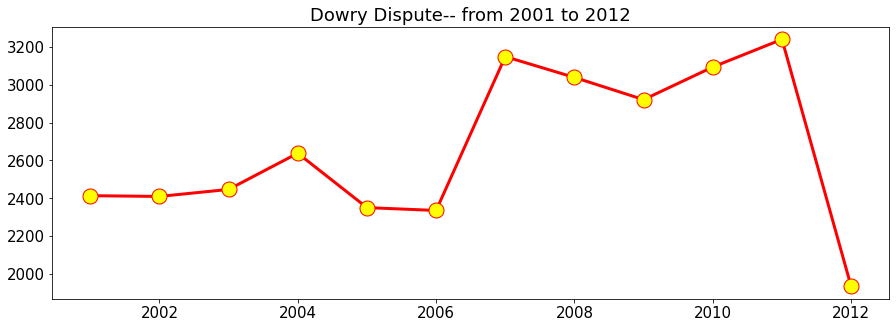

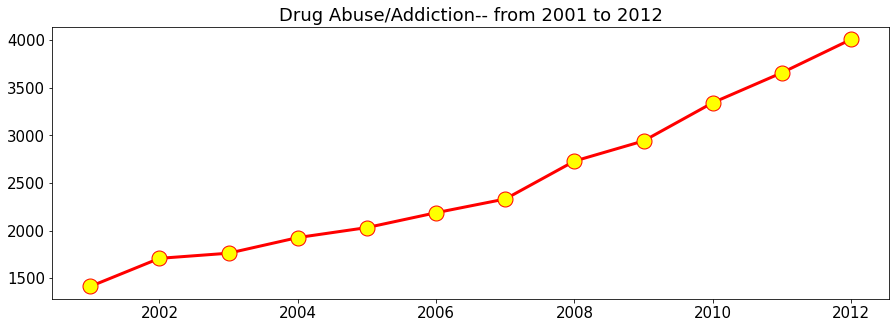

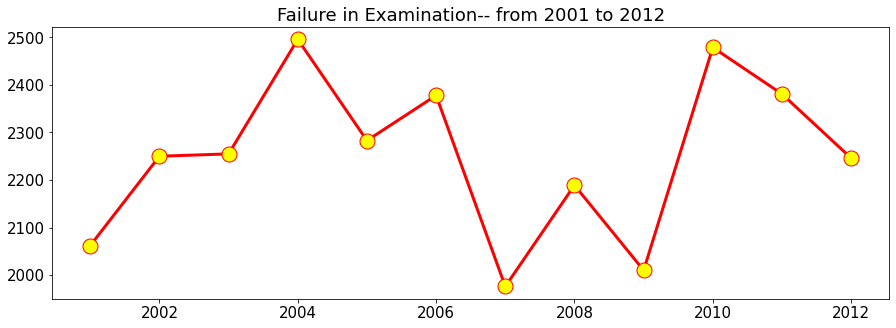

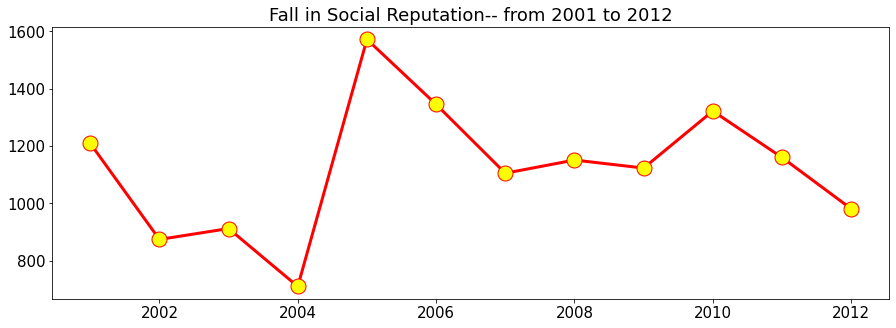

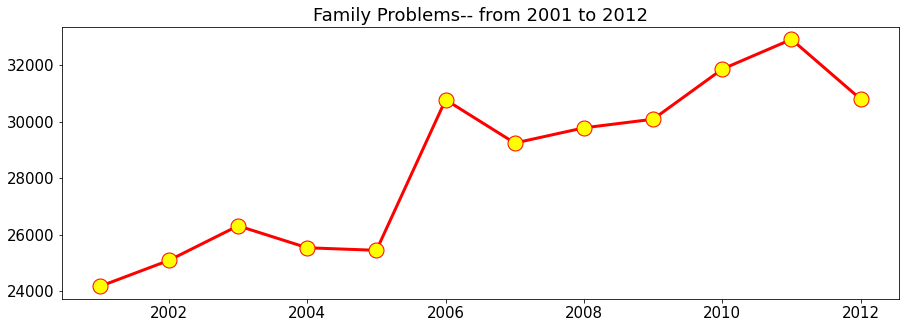

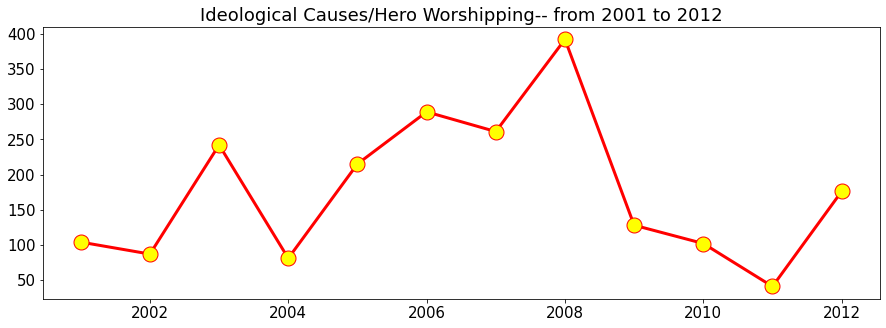

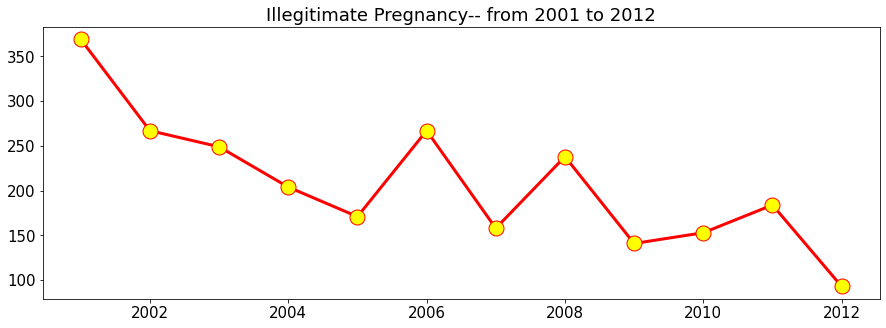

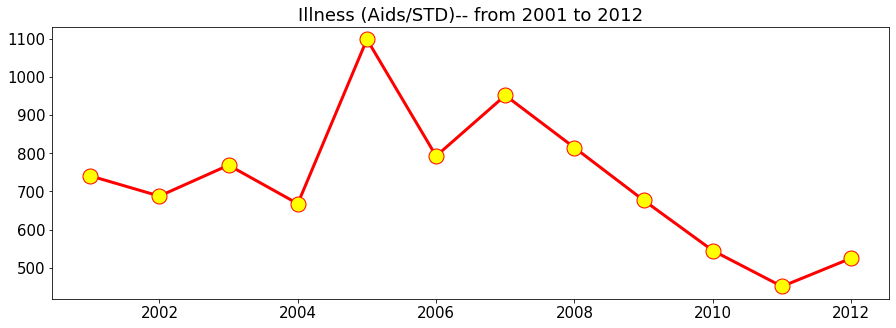

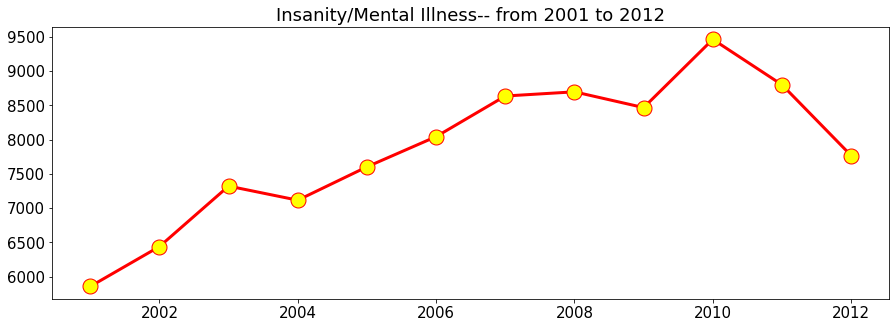

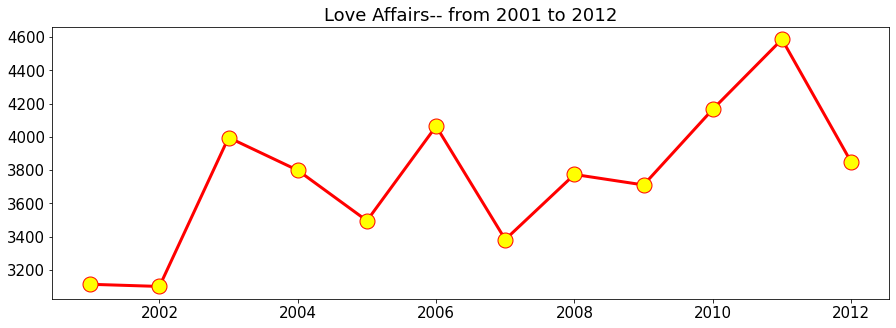

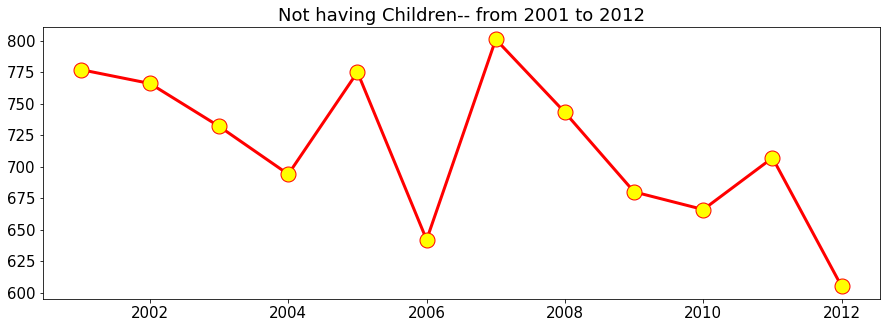

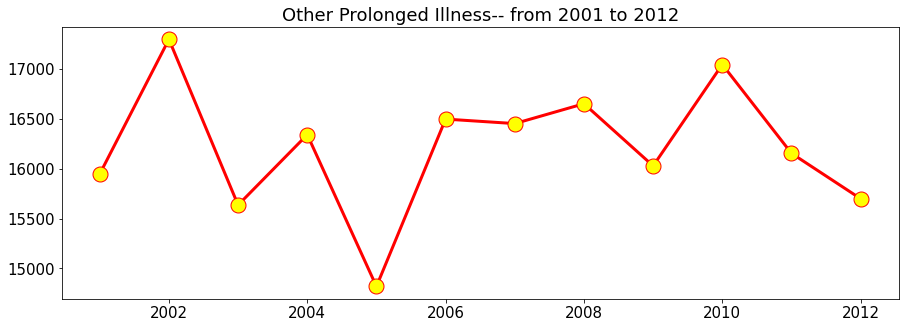

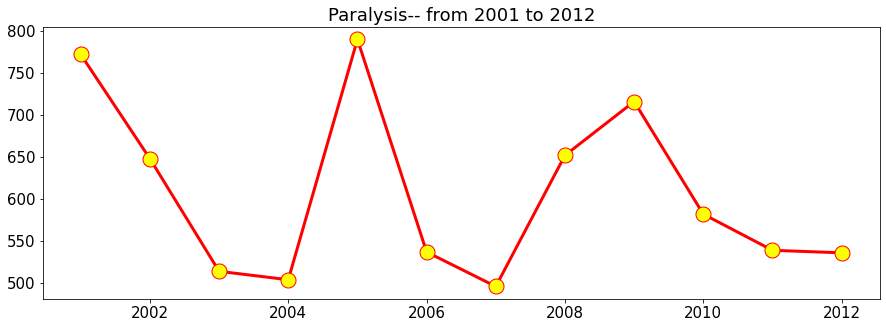

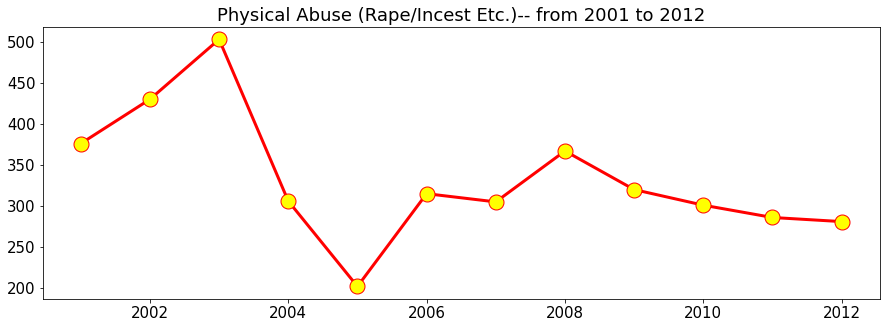

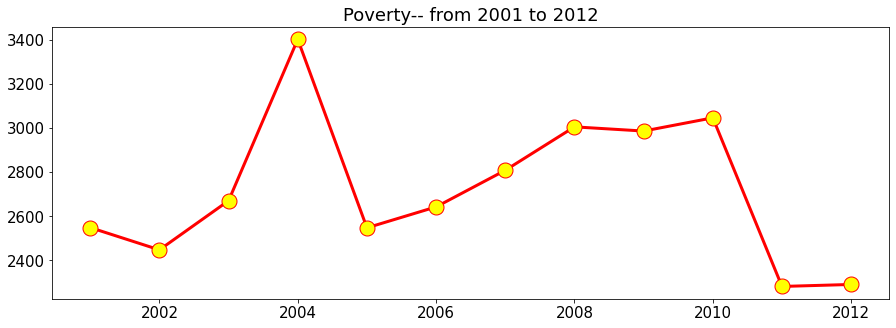

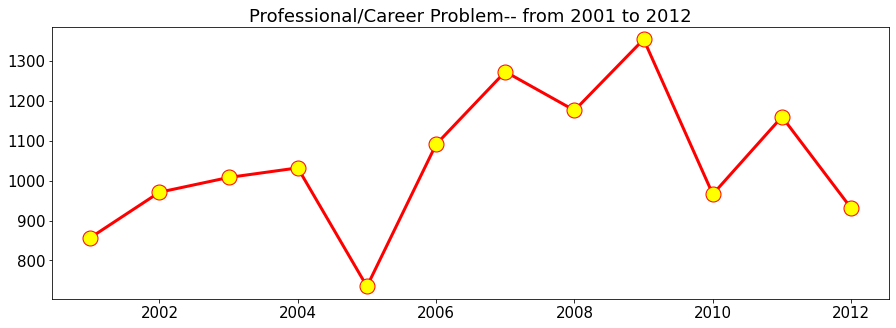

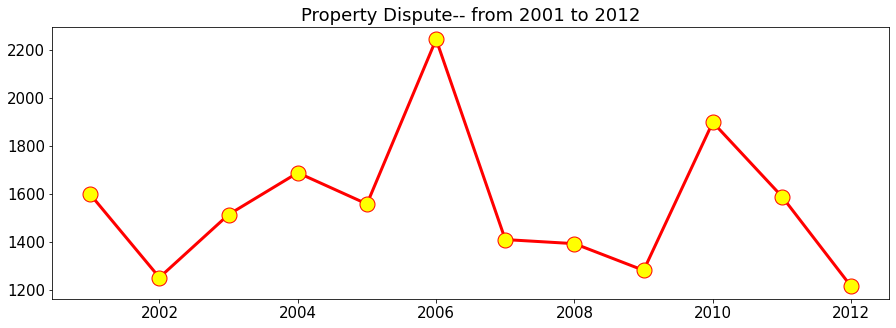

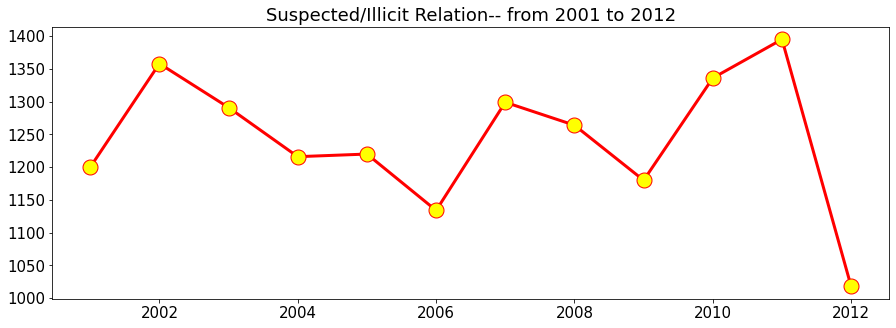

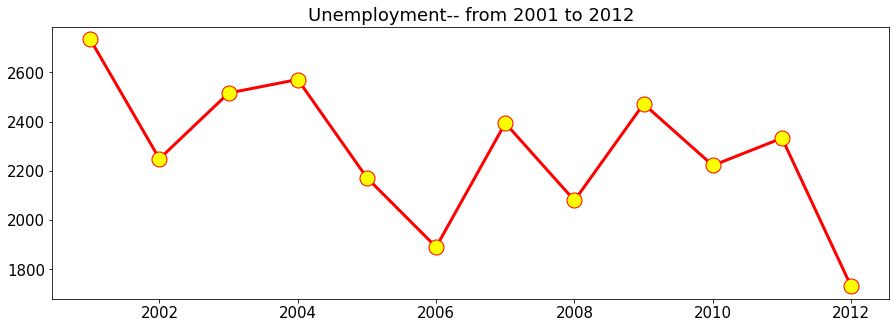

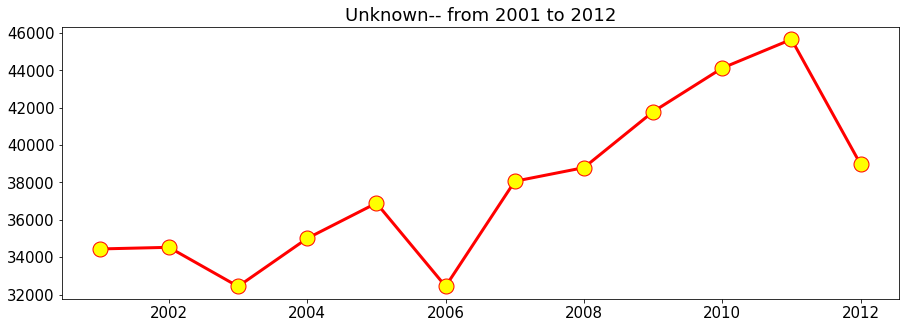

In [44]:
year_reasons = suicide_reason[['Year', 'Type', 'Total']]
year_reasons = year_reasons.groupby(['Type', 'Year']).sum().reset_index()
reasons = list(year_reasons['Type'].unique())
for reason in reasons:
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize = (15,5))
    each_reason = year_reasons[year_reasons['Type'] == reason]
    plt.plot( 'Year', 'Total', data=each_reason, marker='o', markerfacecolor='yellow', markersize=15, color='red', linewidth=3)
    plt.title(reason + '-- from 2001 to 2012')
    plt.show()

## How suicide rate is changing ?

In [45]:
yearwise = yearwise.sort_values('Year',ascending = True)
yearwise

Year   Total
0   2001  325428
1   2002  331146
2   2003  332516
3   2004  340955
4   2005  341717
5   2006  354319
6   2007  367845
7   2008  374980
8   2009  381127
9   2010  403728
10  2011  405989
11  2012  376398

In [46]:
Death_per_year = list(yearwise['Total'])

In [47]:
suicide_rate_year = [round(((Death_per_year[i]-Death_per_year[i-1])/Death_per_year[i-1])*100,2) for i in range(1,len(Death_per_year))]

In [48]:
suicide_rate_year

[1.76, 0.41, 2.54, 0.22, 3.69, 3.82, 1.94, 1.64, 5.93, 0.56, -7.29]

In [49]:
for i in range(1,len(suicide_rate_year)):
    suicide_rate_year[i]=round(suicide_rate_year[i-1]+suicide_rate_year[i],2)
suicide_rate_year

[1.76, 2.17, 4.71, 4.93, 8.62, 12.44, 14.38, 16.02, 21.95, 22.51, 15.22]

In [50]:
year = list(yearwise['Year'])[1:]
year

[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

In [51]:
rate_year = pd.DataFrame({
    'Year':year,
    'Suicide_rate':suicide_rate_year
})
rate_year

Year  Suicide_rate
0   2002          1.76
1   2003          2.17
2   2004          4.71
3   2005          4.93
4   2006          8.62
5   2007         12.44
6   2008         14.38
7   2009         16.02
8   2010         21.95
9   2011         22.51
10  2012         15.22

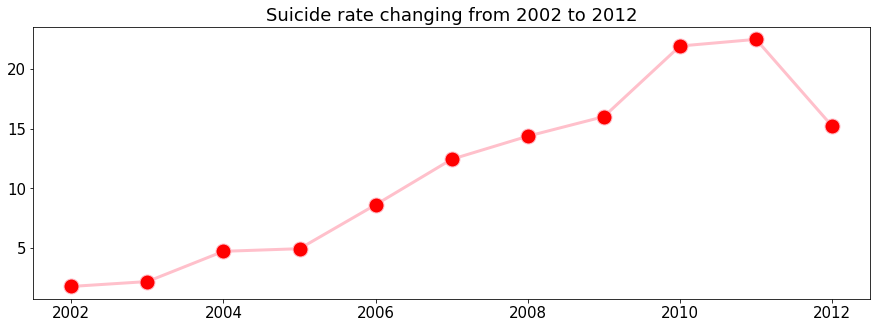

In [52]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize = (15,5))
plt.plot('Year','Suicide_rate',data=rate_year,marker='o',markerfacecolor='red',markersize=15,color='pink',linewidth=3)
plt.title('Suicide rate changing from 2002 to 2012')
plt.show()